# Genetic Disease Classification
# 1. Business Problem
A genetic disorder is a health condition that is usually caused by mutations in DNA or changes in the number or overall structure of chromosomes. Several types of commonly-known diseases are related to hereditary gene mutations. Many children succumb to these disorders and it is extremely important that genetic testing be done during pregnancy.Without medical expertise it would be really difficult to categorize a disease from patient’s information, here we are trying to classify a genetic disease into one of its 3 categories and sub categories using the medical information of the patient. This would be beneficial for the early diagnosis of the Genetic disease and will reduce the effort spent by the medical expert towards diagnosis of aliment which will in fact give more time to treat the patient.This problem is taken from kaggle(https://www.kaggle.com/aibuzz/predict-the-genetic-disorders-datasetof-genomes).
## 1.2 Problem Statement
Given medical history of a child with genetic disorder we need to predict the Disorder Class and Subclass of the Disorder
## 1.3 Sources
* Source : https://www.kaggle.com/aibuzz/predict-the-genetic-disorders-datasetof-genomes
## 1.4 Real world/Business Objectives and Constraints
* The cost of misclassification is high because it could lead to different treatment for entirely different genetic disease.
* There is no low latency requirement for the problem.
* The model must be highly interpretable to suggest on what basis the model is classifying the genetic disease for the medical practitioner to verify and probability scores are also required.


# 2. Machine Learning Problem
## 2.1 Data
### 2.1.1 Data Overview
The data is contained in two files test.csv and train.csv where, train.csv file contains target variables and test.csv file is used for testing.
## 2.2 Mapping the Real World problem to a Machine Learning Problem
### 2.2.1 Type of Machine Learning Problem
It is a multi-label classification problem, where we need to predict the Genetic Disorder and Disorder subclass.

In [1]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tqdm import tqdm
import joblib
from sklearn.manifold import TSNE
import re
from sklearn.preprocessing import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading train and test data into dataframe
df_train = pd.read_csv('C:/Users/akhil/Documents/Genetic_Disease_Classification/Data/train.csv')
df_test = pd.read_csv('C:/Users/akhil/Documents/Genetic_Disease_Classification/Data/test.csv')

## 2.3 Exploratory Data Analysis

In [3]:
# Analyzing number of rows and columns both train and test data contains
print('Train data \n # rows : {0} \n # columns : {1}'.format(df_train.shape[0],df_train.shape[1]))
print('Test data \n # rows : {0} \n # columns : {1}'.format(df_test.shape[0],df_test.shape[1]))

Train data 
 # rows : 21011 
 # columns : 45
Test data 
 # rows : 9465 
 # columns : 43


In [4]:
# checking all the column names of the dataset
df_train.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min)', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', '

### 2.3.1 Data Pre-Processing and Cleaning

In [5]:
def column_name_pre_processor(x):
    '''
    This function takes a list of strings as inputs and outputs a list of strings which are pre processed 
    by removing special characters, converting all the alphabets into lowercase and replacing spaces with '_'.
    '''
    result = []
    #iterating through all the strings
    for i in x:
        i = re.sub('\'s','',i)
        #removes all the words between the braces including the braces
        i = re.sub('\\(.*?\\)','',i)
        i = i.replace('-',' ')
        i = i.replace('.','')
        i = i.replace('H/O','')
        i = i.replace('IVF/ART','')
        #remove all the leading and trailing white spaces
        i = i.strip()
        i = i.lower()
        #replaces all the whitespaces with '_'
        i = i.replace(' ','_')
        result.append(i)
    return result        

In [6]:
# storing all the pre processed column names of train data
train_cols = column_name_pre_processor(df_train.columns)
test_cols = ['patient_id', 'patient_age', 'genes_in_mother_side',
       'inherited_from_father', 'maternal_gene', 'paternal_gene',
       'blood_cell_count', 'patient_first_name', 'family_name', 'father_name',
       'mother_age', 'father_age', 'institute_name', 'location_of_institute',
       'status', 'respiratory_rate', 'heart_rate', 'test_1', 'test_2',
       'test_3', 'test_4', 'test_5', 'parental_consent', 'follow_up', 'gender',
       'birth_asphyxia', 'autopsy_shows_birth_defect', 'place_of_birth',
       'folic_acid_details', 'serious_maternal_illness', 'radiation_exposure',
       'substance_abuse', 'assisted_conception',
       'history_of_anomalies_in_previous_pregnancies',
       'no_of_previous_abortion', 'birth_defects', 'white_blood_cell_count',
       'blood_test_result', 'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4',
       'symptom_5']

# creating dictionaries to rename all columns in train and test data
train_dict = {i:j for i,j in zip(df_train.columns,train_cols)}
test_dict = {i:j for i,j in zip(df_test.columns,test_cols)}

# renaming all the columns in train and test dataframes
df_train = df_train.rename(columns=train_dict)
df_test = df_test.rename(columns=test_dict)

In [7]:
df_train.columns

Index(['patient_id', 'patient_age', 'genes_in_mother_side',
       'inherited_from_father', 'maternal_gene', 'paternal_gene',
       'blood_cell_count', 'patient_first_name', 'family_name', 'father_name',
       'mother_age', 'father_age', 'institute_name', 'location_of_institute',
       'status', 'respiratory_rate', 'heart_rate', 'test_1', 'test_2',
       'test_3', 'test_4', 'test_5', 'parental_consent', 'follow_up', 'gender',
       'birth_asphyxia', 'autopsy_shows_birth_defect', 'place_of_birth',
       'folic_acid_details', 'serious_maternal_illness', 'radiation_exposure',
       'substance_abuse', 'assisted_conception',
       'history_of_anomalies_in_previous_pregnancies',
       'no_of_previous_abortion', 'birth_defects', 'white_blood_cell_count',
       'blood_test_result', 'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4',
       'symptom_5', 'genetic_disorder', 'disorder_subclass'],
      dtype='object')

In [8]:
df_test.columns

Index(['patient_id', 'patient_age', 'genes_in_mother_side',
       'inherited_from_father', 'maternal_gene', 'paternal_gene',
       'blood_cell_count', 'patient_first_name', 'family_name', 'father_name',
       'mother_age', 'father_age', 'institute_name', 'location_of_institute',
       'status', 'respiratory_rate', 'heart_rate', 'test_1', 'test_2',
       'test_3', 'test_4', 'test_5', 'parental_consent', 'follow_up', 'gender',
       'birth_asphyxia', 'autopsy_shows_birth_defect', 'place_of_birth',
       'folic_acid_details', 'serious_maternal_illness', 'radiation_exposure',
       'substance_abuse', 'assisted_conception',
       'history_of_anomalies_in_previous_pregnancies',
       'no_of_previous_abortion', 'birth_defects', 'white_blood_cell_count',
       'blood_test_result', 'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4',
       'symptom_5'],
      dtype='object')

In [9]:
df_train.dtypes

patient_id                                       object
patient_age                                     float64
genes_in_mother_side                             object
inherited_from_father                            object
maternal_gene                                    object
paternal_gene                                    object
blood_cell_count                                float64
patient_first_name                               object
family_name                                      object
father_name                                      object
mother_age                                      float64
father_age                                      float64
institute_name                                   object
location_of_institute                            object
status                                           object
respiratory_rate                                 object
heart_rate                                       object
test_1                                          

In [10]:
#Finding number of classes in Genetic Disorder and Disorder Subclass
print('# Classes in Genetic Disorder:{0}'.format(df_train['genetic_disorder'].nunique()))
print('# Disorder Subclass:{0}'.format(df_train['disorder_subclass'].nunique()))

# Classes in Genetic Disorder:3
# Disorder Subclass:9


In [11]:
# Checking for the null values in the data set
df_train.isnull().sum()

patient_id                                         0
patient_age                                     1368
genes_in_mother_side                               0
inherited_from_father                            287
maternal_gene                                   2694
paternal_gene                                      0
blood_cell_count                                   0
patient_first_name                                 0
family_name                                     9240
father_name                                        0
mother_age                                      5718
father_age                                      5689
institute_name                                  4860
location_of_institute                              0
status                                             0
respiratory_rate                                2059
heart_rate                                      2025
test_1                                          2019
test_2                                        

* Except for few features there are missing values in all the features, there are some rows where target variables are missing.

In [12]:
df_test = df_test.replace([-99,'-99'],np.NaN)

In [13]:
# Getting all the row indicies where both the target varibles (Genetic Disorder and Disorder Subclass) are missing
missing_indicies = df_train.loc[((df_train.genetic_disorder.isnull() & df_train.disorder_subclass.isnull()) | (df_train.genetic_disorder.isnull()|df_train.disorder_subclass.isnull()))==True].index

#removing all the rows from the train data where the target varibales Genetic Disorder and Disorder subclass are null
df_train.drop(index=missing_indicies,inplace=True)

In [14]:
print("Shape of Training data after dropping all the rows which have nan values in genetic disorder and disorder subclass :",df_train.shape)

Shape of Training data after dropping all the rows which have nan values in genetic disorder and disorder subclass : (17160, 45)


In [15]:
#droping unecessary columns like patient_id, family_name, patient_first_name, father_name
df_train.drop(labels = ['patient_id','family_name','patient_first_name','father_name'],axis=1,inplace=True)
df_test.drop(labels = ['family_name','patient_first_name','father_name'],axis=1,inplace=True)

In [16]:
print(df_train.shape)
print(df_test.shape)

(17160, 41)
(9465, 40)


In [17]:
def column_separator(x):
    '''This function takes dataframe as input and returns list of all numerical columns and categorical columns'''
    num,cat=[],[]
    for i in x.columns:
        #condition to check whether the column is numerical or not
        if x[i].dtype==np.float64 or x[i].dtype==np.int64 :
            num.append(i)
        #condition to check whether the column is categorical or not
        elif x[i].dtype==np.object:
            cat.append(i)
    return num,cat

##### Encoding both the target classes Genetic_Disorder and Disorder_Subclass using Label Encoder

In [20]:
enc = LabelEncoder()
df_train['target_1']=enc.fit_transform(df_train['genetic_disorder'])

In [21]:
enc_ = LabelEncoder()
df_train['target_2']=enc_.fit_transform(df_train['disorder_subclass'])

In [22]:
df_train.drop(['genetic_disorder','disorder_subclass'],axis=1,inplace=True)

##### Analyzing missing values in the dataset  

In [25]:
# percentage of values of null values in each feature
(df_train.isnull().sum()/df_train.shape[0])*100

patient_age                                      5.909091
genes_in_mother_side                             0.000000
inherited_from_father                            1.200466
maternal_gene                                   11.590909
paternal_gene                                    0.000000
blood_cell_count                                 0.000000
mother_age                                      24.574592
father_age                                      24.423077
institute_name                                  20.903263
location_of_institute                            0.000000
status                                           0.000000
respiratory_rate                                 8.776224
heart_rate                                       8.525641
test_1                                           8.729604
test_2                                           8.840326
test_3                                           8.682984
test_4                                           8.741259
test_5        

In [26]:
(df_test.isnull().sum()/df_train.shape[0])*100

patient_id                                       0.000000
patient_age                                      0.000000
genes_in_mother_side                             0.000000
inherited_from_father                            3.210956
maternal_gene                                   21.695804
paternal_gene                                    0.000000
blood_cell_count                                 0.000000
mother_age                                       0.000000
father_age                                       0.000000
institute_name                                  29.160839
location_of_institute                            0.000000
status                                           0.000000
respiratory_rate                                29.085082
heart_rate                                      28.986014
test_1                                          12.354312
test_2                                          12.127040
test_3                                          12.231935
test_4        

<AxesSubplot:>

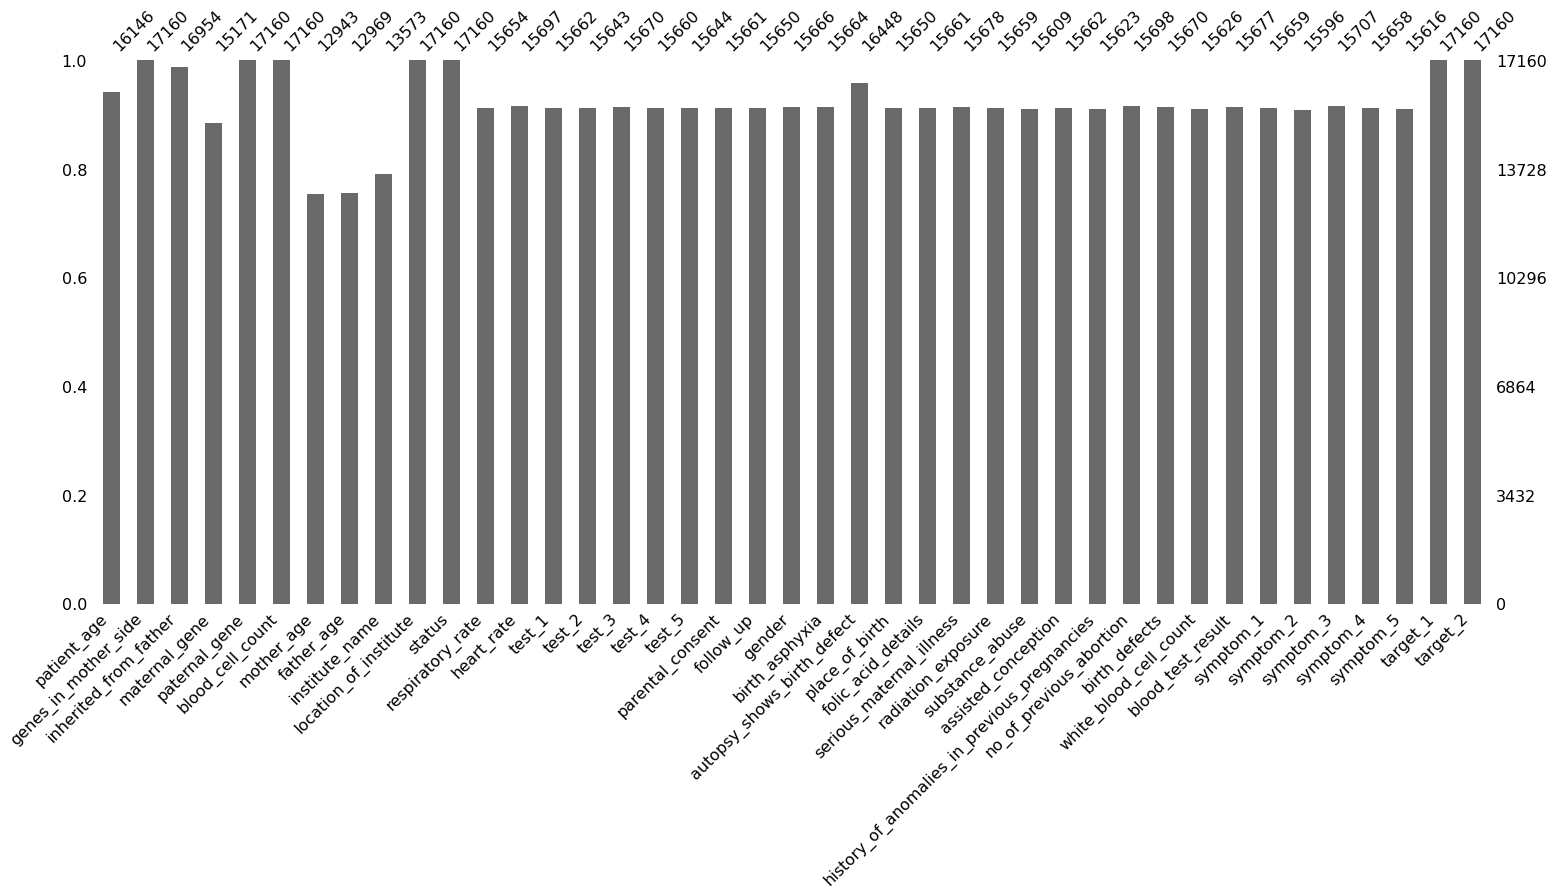

In [27]:
import missingno as msno
msno.bar(df_train)

* less than 80 percentage of missing values can be seen in mother_age,father_age and institute_name features when compared to other features.


<AxesSubplot:>

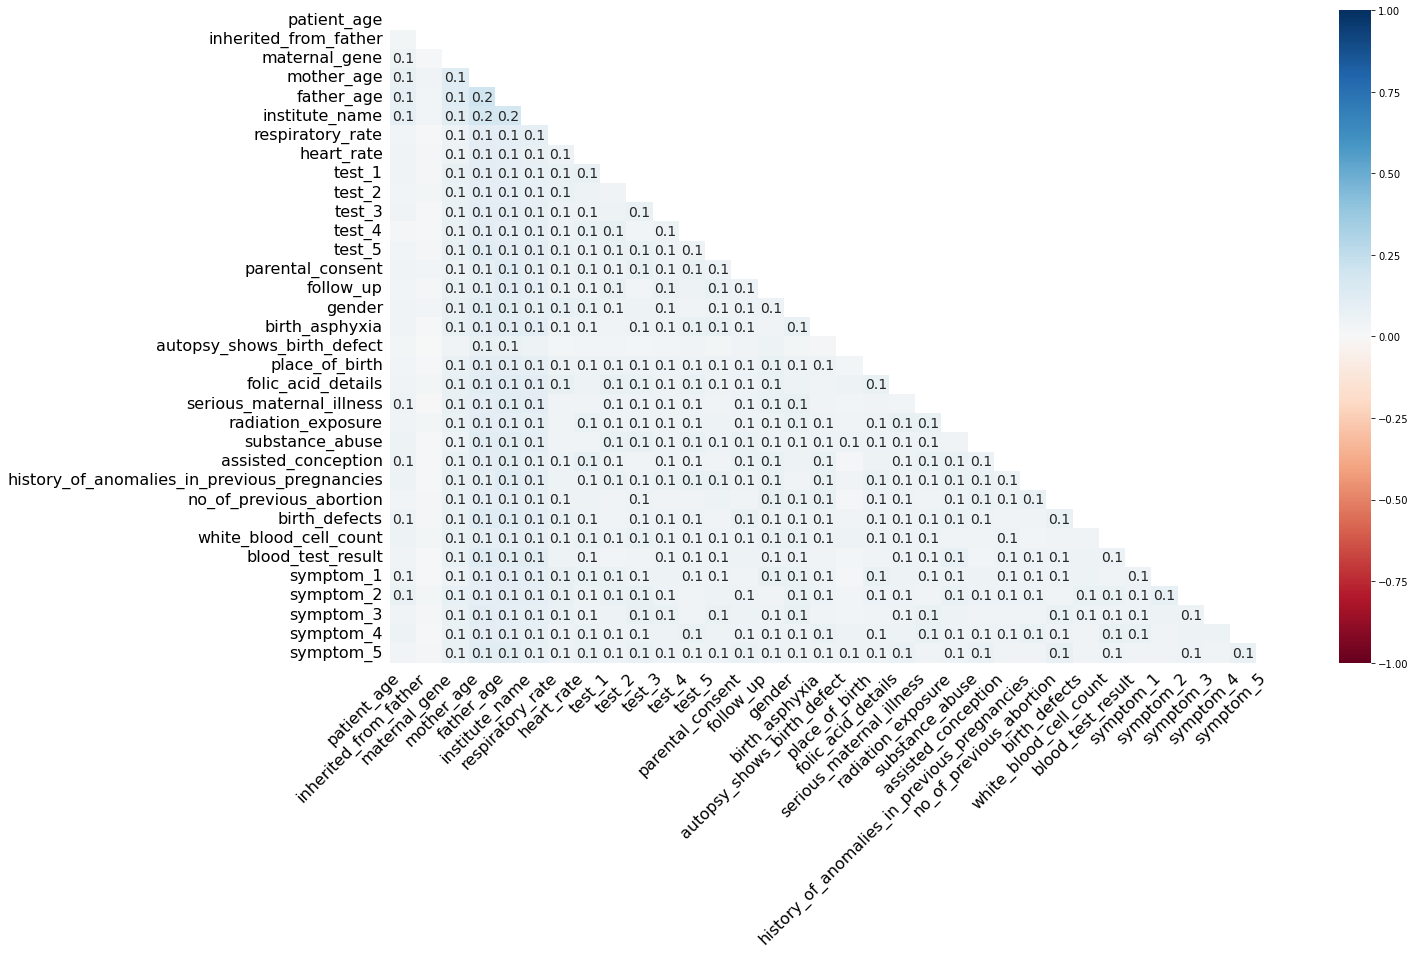

In [28]:
msno.heatmap(df_train)

* Observing the above heatmap that missing values in all the features doesn't depend on missing values in other features.
* mother_age,father_age and institute_name seems to have a little more correlated of their's missing values.
* From the Heatmap and barplots we can confirm that data missing among doesn't have strong correlation, this shows that Data is **Missing at Random (MAR)**.

##### Checking the distribution of the target_1 variable in the dataset

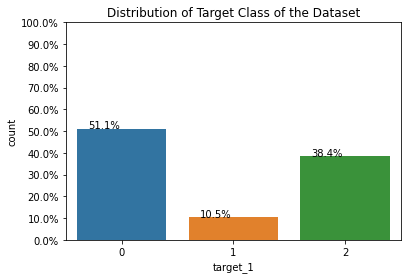

In [29]:
#Reference : Code taken from microsoft malware assignment
total = len(df_train)*1.
ax=sns.countplot(x="target_1", data=df_train)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))

ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.title('Distribution of Target Class of the Dataset')
plt.show()


##### Checking the distribution of the target_2 variable in the dataset

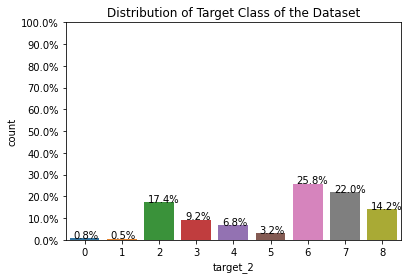

In [30]:
#Reference : Code taken from microsoft malware assignment
total = len(df_train)*1.
ax=sns.countplot(x="target_2", data=df_train)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))

ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.title('Distribution of Target Class of the Dataset')
plt.show()


* From the above plot we can tell that data is imbalanced with class 1 and 2 dominant whereas class 3 and 4 are minimal

##### Performance Metric
In this problem we can use two performance metrics:
* multi-class Log-loss
* Macro F1-Score since both the precison and recall are equally important 
* Since the data is imbalanced we use **Macro F1-Score** as performance metric and **multi-class logloss** is useful to penalize the probalilities of the prediction irrespictive of the fact whether dataset is balanced or imbalanced.

In [31]:
df_train['num_symptoms'] = df_train[['symptom_1','symptom_2','symptom_3','symptom_4','symptom_5']].sum(axis=1)

In [32]:
# df_train.drop(['symptom_1','symptom_2','symptom_3','symptom_4','symptom_5'],axis=1,inplace=True)

In [33]:
for i in ['symptom_1','symptom_2','symptom_3','symptom_4','symptom_5']:
    df_test[i] = np.where(df_test[i]==True,1,df_test[i])

In [34]:
df_test['num_symptoms'] = df_test[['symptom_1','symptom_2','symptom_3','symptom_4','symptom_5']].sum(axis=1)
# df_test.drop(['symptom_1','symptom_2','symptom_3','symptom_4','symptom_5'],axis=1,inplace=True)

In [35]:
#percentage of the different locations of institutions
(df_train.location_of_institute.value_counts()/len(df_train))*100

-                                                                                            49.370629
125 PARKER HILL AV\nJAMAICA PLAIN, MA 02120\n(42.329611374844326, -71.10616871232227)         3.793706
249 RIVER ST\nMATTAPAN, MA 02126\n(42.27137912172521, -71.08168028446168)                     2.214452
2100 DORCHESTER AV\nDORCHESTER, MA 02124\n(42.27854306401838, -71.06631280050811)             2.109557
1200 Centre St\nRoslindale, MA 02131\n(42.29738386053219, -71.13150465441208)                 2.109557
300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42.337592548462226, -71.10472284437952)           2.057110
1400 VFW Parkway\nWest Roxbury, MA 02132\n(42.27598935537618, -71.17245195460838)             2.051282
59 TOWNSEND ST\nROXBURY, MA 02119\n(42.31856289432221, -71.09165569529381)                    2.039627
75 FRANCIS ST\nFENWAY/KENMORE, MA 02115\n(42.33587602903896, -71.10741054246668)              2.033800
30 WARREN ST\nALLSTON/BRIGHTON, MA 02134\n(42.352620000312925, -71.132810

* Almost 50% of data doesn't have location_of_the_institue so we can drop this feature

In [36]:
df_train.drop('location_of_institute',axis=1,inplace=True)
df_test.drop('location_of_institute',axis=1,inplace=True)

In [37]:
#numerical and categorical are two lists which contain list of names of all numerical and categorical columns
numerical,categorical = column_separator(df_train)

###### Analyzing blood_cell_count feature

<AxesSubplot:xlabel='blood_cell_count'>

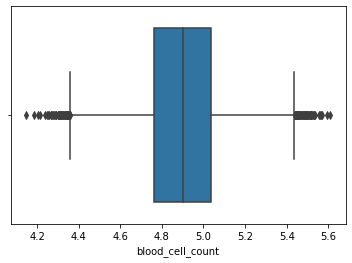

In [38]:
sns.boxplot(df_train['blood_cell_count'])

from the above plot we can see there are outliers in the feature. Let's see different percentile values of the feature

In [39]:
percentiles = [0,1,10,25,90,95,99,99.9]
for i in percentiles:
    print(str(i)+" Percentile",np.percentile(df_train['blood_cell_count'],i))

0 Percentile 4.146229815
1 Percentile 4.44407415751
10 Percentile 4.6415494608
25 Percentile 4.76429670975
90 Percentile 5.153594224
95 Percentile 5.226561663449999
99 Percentile 5.366042527
99.9 Percentile 5.510704798965


we will consider values from 1st percentile to 99th percentile and see whether we have outliers in the feature

In [40]:
percentile_99 =  np.percentile(df_train['blood_cell_count'],99)
percentile_1 = np.percentile(df_train['blood_cell_count'],1)

<AxesSubplot:xlabel='blood_cell_count'>

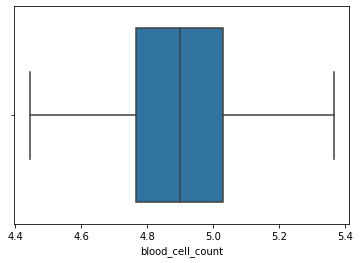

In [41]:
sns.boxplot(df_train['blood_cell_count'].loc[(df_train['blood_cell_count']<percentile_99) & (df_train['blood_cell_count']>percentile_1)])

We can see the there are no outliers if we consider 1st and 99th percentile values of the feature so, we will drop the rows with outliers.

In [42]:
df_train = df_train.loc[(df_train['blood_cell_count']<percentile_99) & (df_train['blood_cell_count']>percentile_1)]

In [43]:
numerical

['patient_age',
 'blood_cell_count',
 'mother_age',
 'father_age',
 'test_1',
 'test_2',
 'test_3',
 'test_4',
 'test_5',
 'no_of_previous_abortion',
 'white_blood_cell_count',
 'symptom_1',
 'symptom_2',
 'symptom_3',
 'symptom_4',
 'symptom_5',
 'num_symptoms']

##### Boxplots of all numerical features against target_1

Text(0.5, 0.98, 'Boxplots of all numerical features against Target')

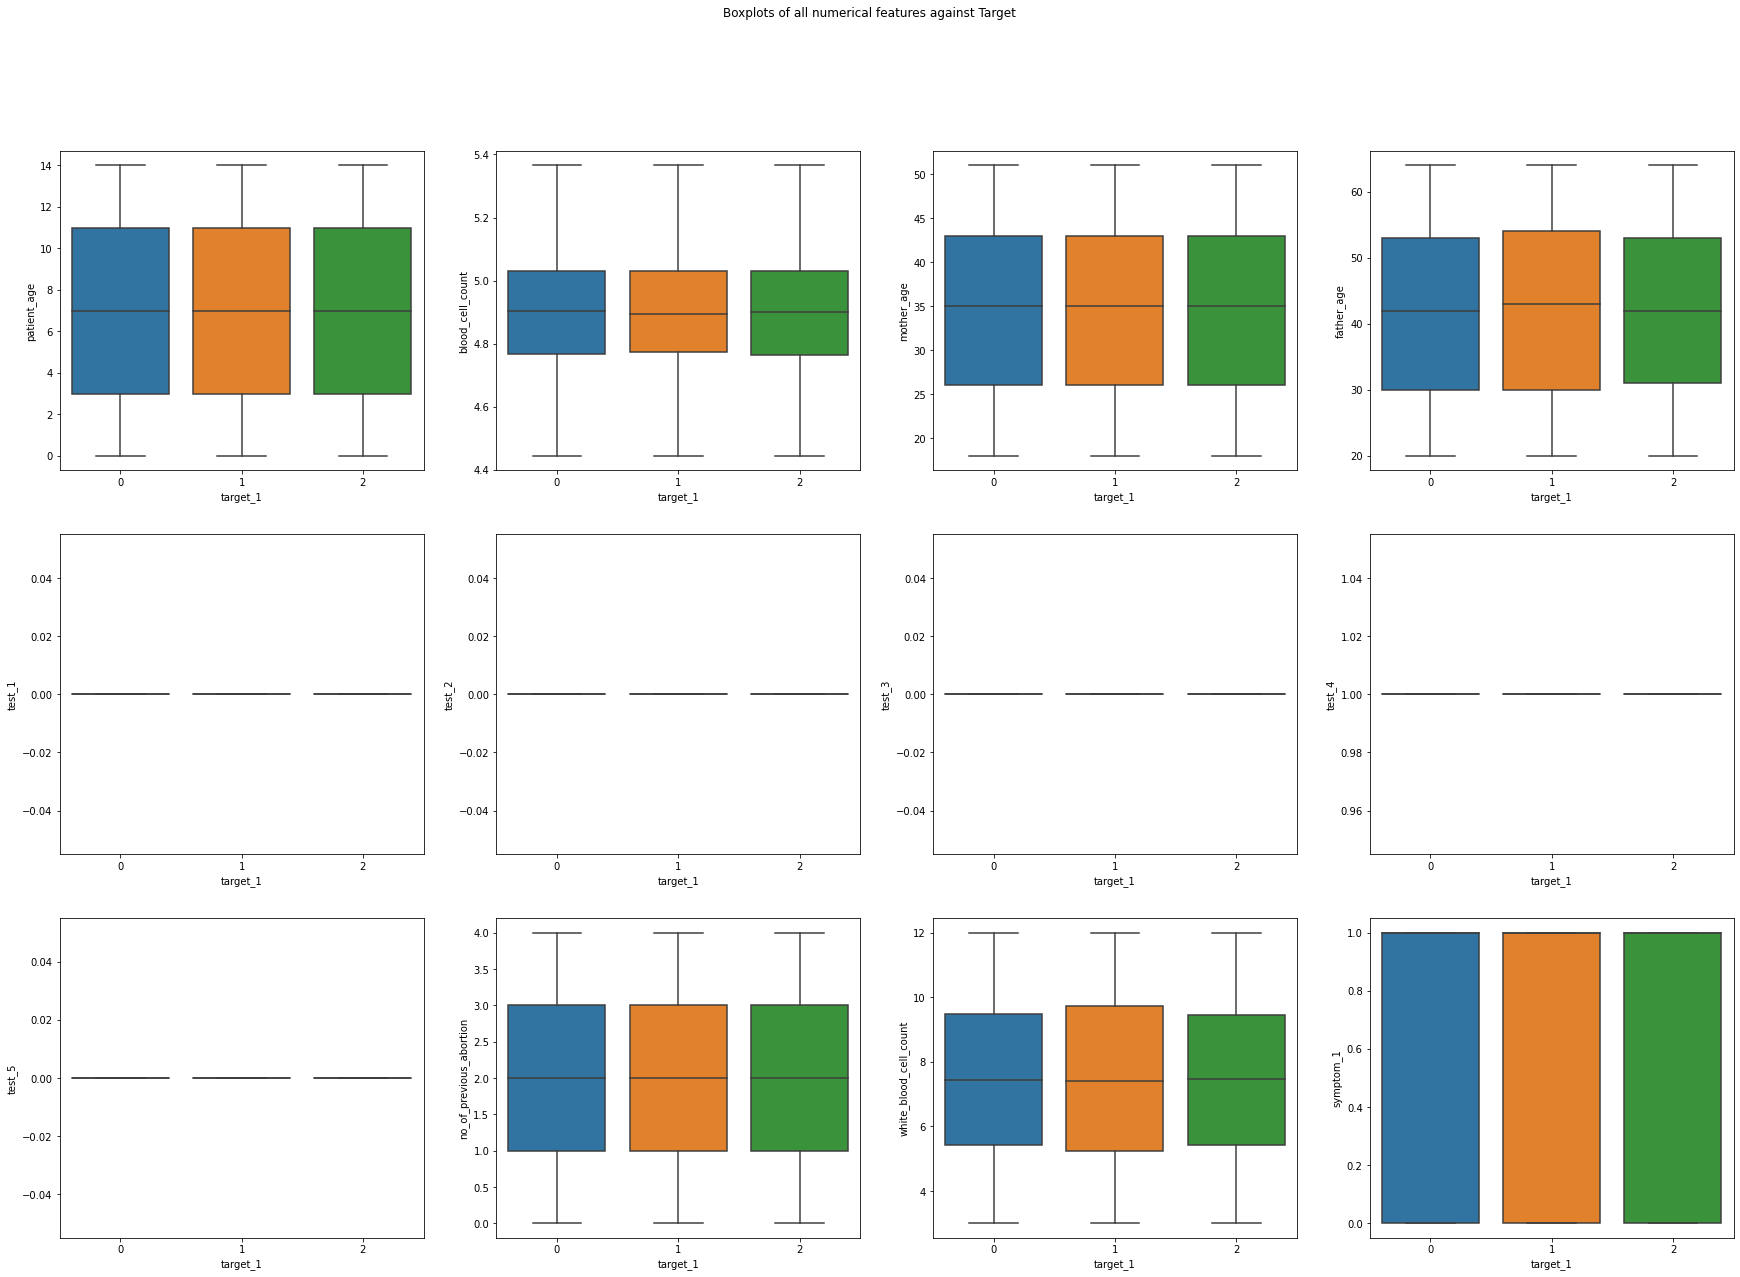

In [44]:
# boxplots of differnent numerical features against target_1 variable
fig, ax = plt.subplots(3,4, figsize=(30, 20))
for i,j in zip(numerical, ax.flatten()):
    sns.boxplot(data=df_train,x='target_1',y=i,ax=j)
for ax in ax.flat: 
    if not bool(ax.has_data()):
        fig.delaxes(ax)
fig.suptitle('Boxplots of all numerical features against Target')

##### Observations from the above plot
* father_age feature has different dispersion of distribution for each class so, it can be helpful in the classification.
* test_1,test_2,test_3,test_4 and test_5 are not helpful so they can be dropped.
* white_blood_cell_count is having similar distribution for all the classes this may be because the patient is already suffering with the disease.
* each class have different distribution for the feature num_symptoms so, this might be important feature

##### Boxplots of all numerical features against target_2

Text(0.5, 0.98, 'Boxplots of all numerical features against Target')

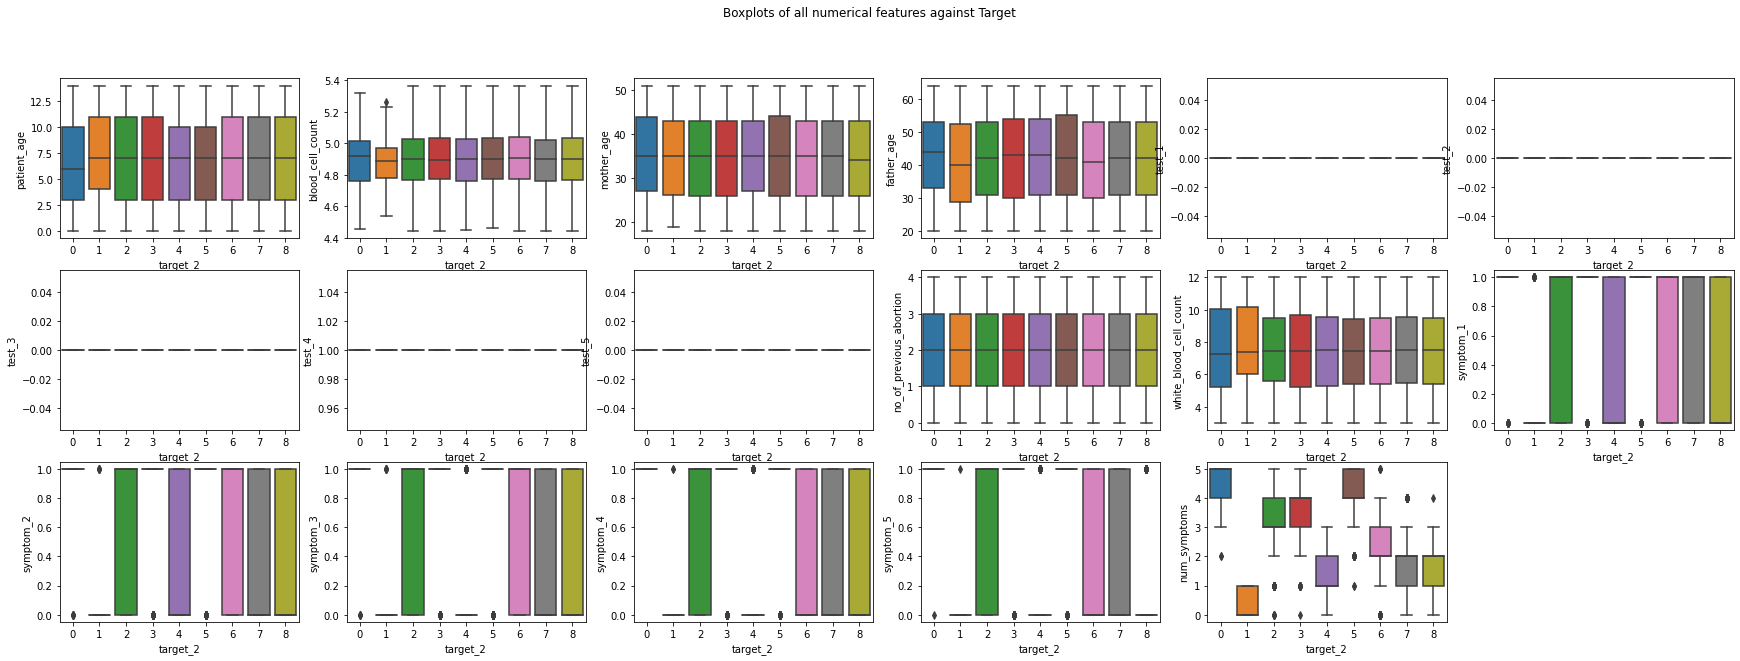

In [45]:
# boxplots of differnent numerical features against target_2 variable
fig, ax = plt.subplots(3,6, figsize=(30, 10))
for i,j in zip(numerical, ax.flatten()):
    sns.boxplot(data=df_train,x='target_2',y=i,ax=j)
for ax in ax.flat: 
    if not bool(ax.has_data()):
        fig.delaxes(ax)
fig.suptitle('Boxplots of all numerical features against Target')

* turn out that num_of_symptoms have significance in determining the disorder_subclass also ie., target_2

In [46]:
# from the above analysis we found out test_1,test_2,test_3,test_4 and test_5 are not useful so dropping the features
df_train.drop(labels=['test_1','test_2','test_3','test_4','test_5'],axis=1,inplace=True)

In [47]:
df_test.drop(labels=['test_1','test_2','test_3','test_4','test_5'],axis=1,inplace=True)

##### Countplots of all categorical features with target_1

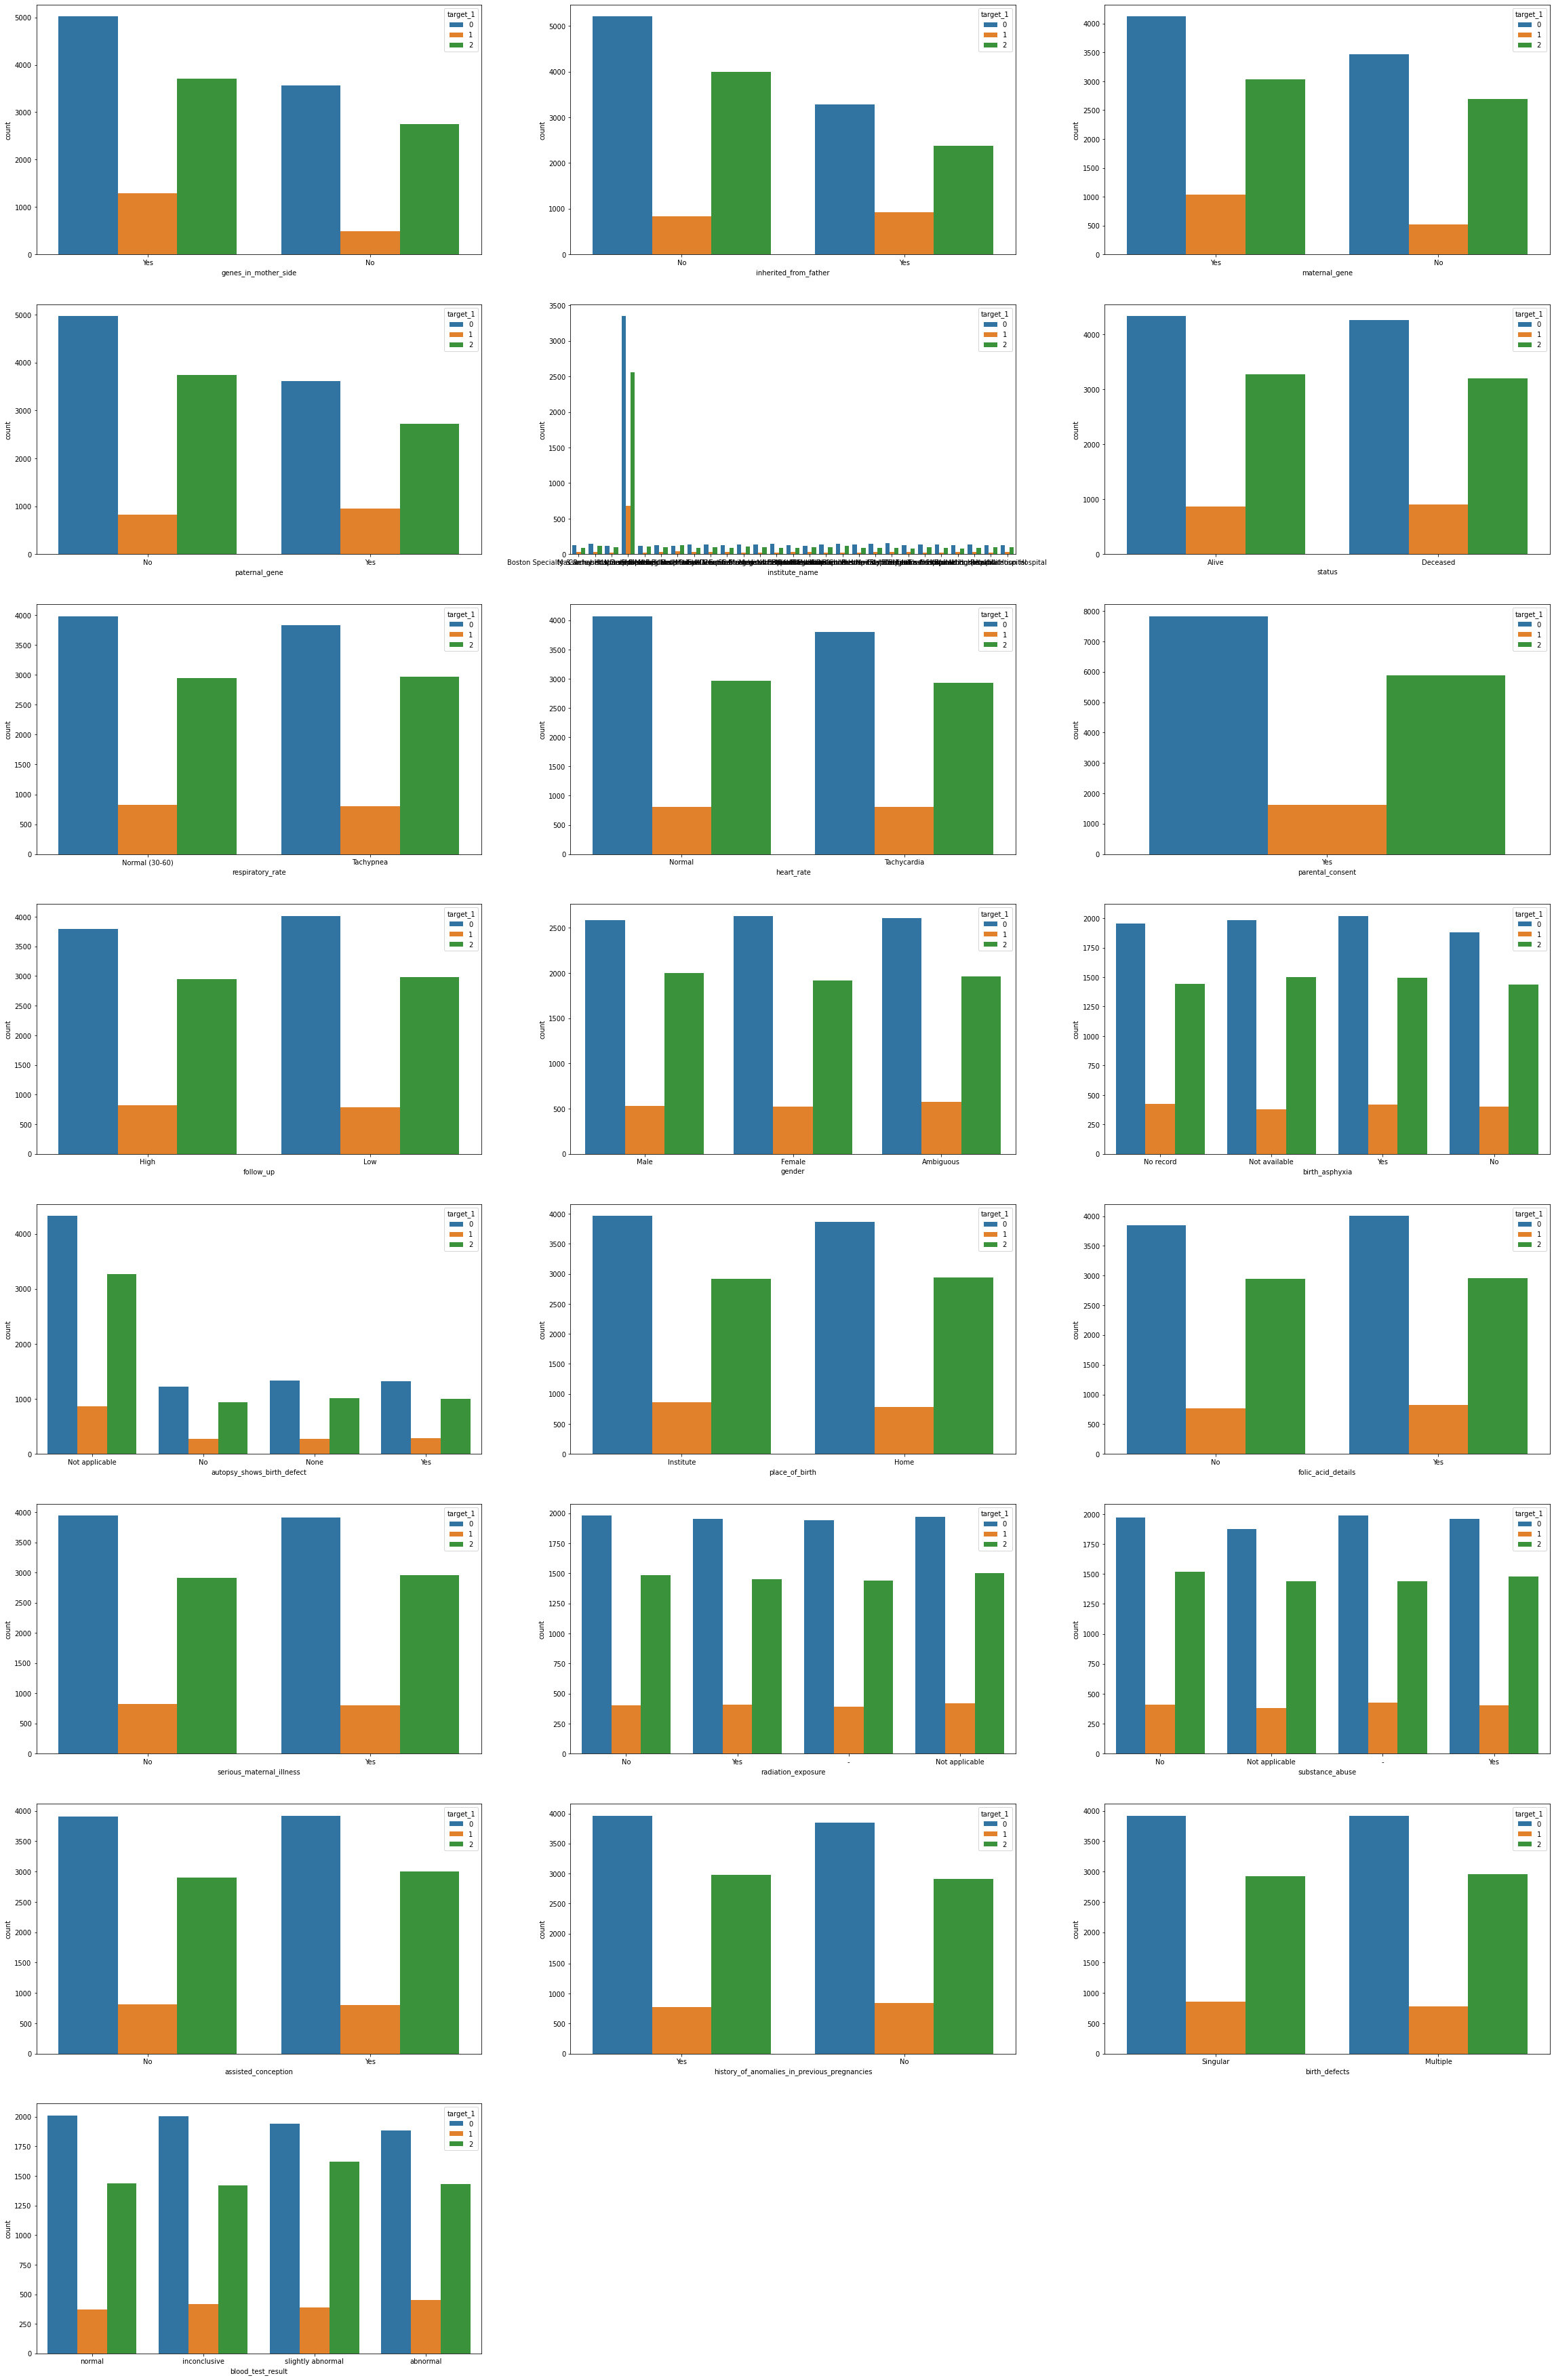

In [48]:
#Reference : https://stackoverflow.com/questions/28738836/matplotlib-with-odd-number-of-subplots
fig, ax = plt.subplots(10, 3, figsize=(40, 80))
for i,j in zip(categorical, ax.flatten()):
    sns.countplot(x=df_train[i],hue=df_train['target_1'],ax=j)
for ax in ax.flat: 
    if not bool(ax.has_data()):
        fig.delaxes(ax)

##### Countplots of all categorical features with target_2

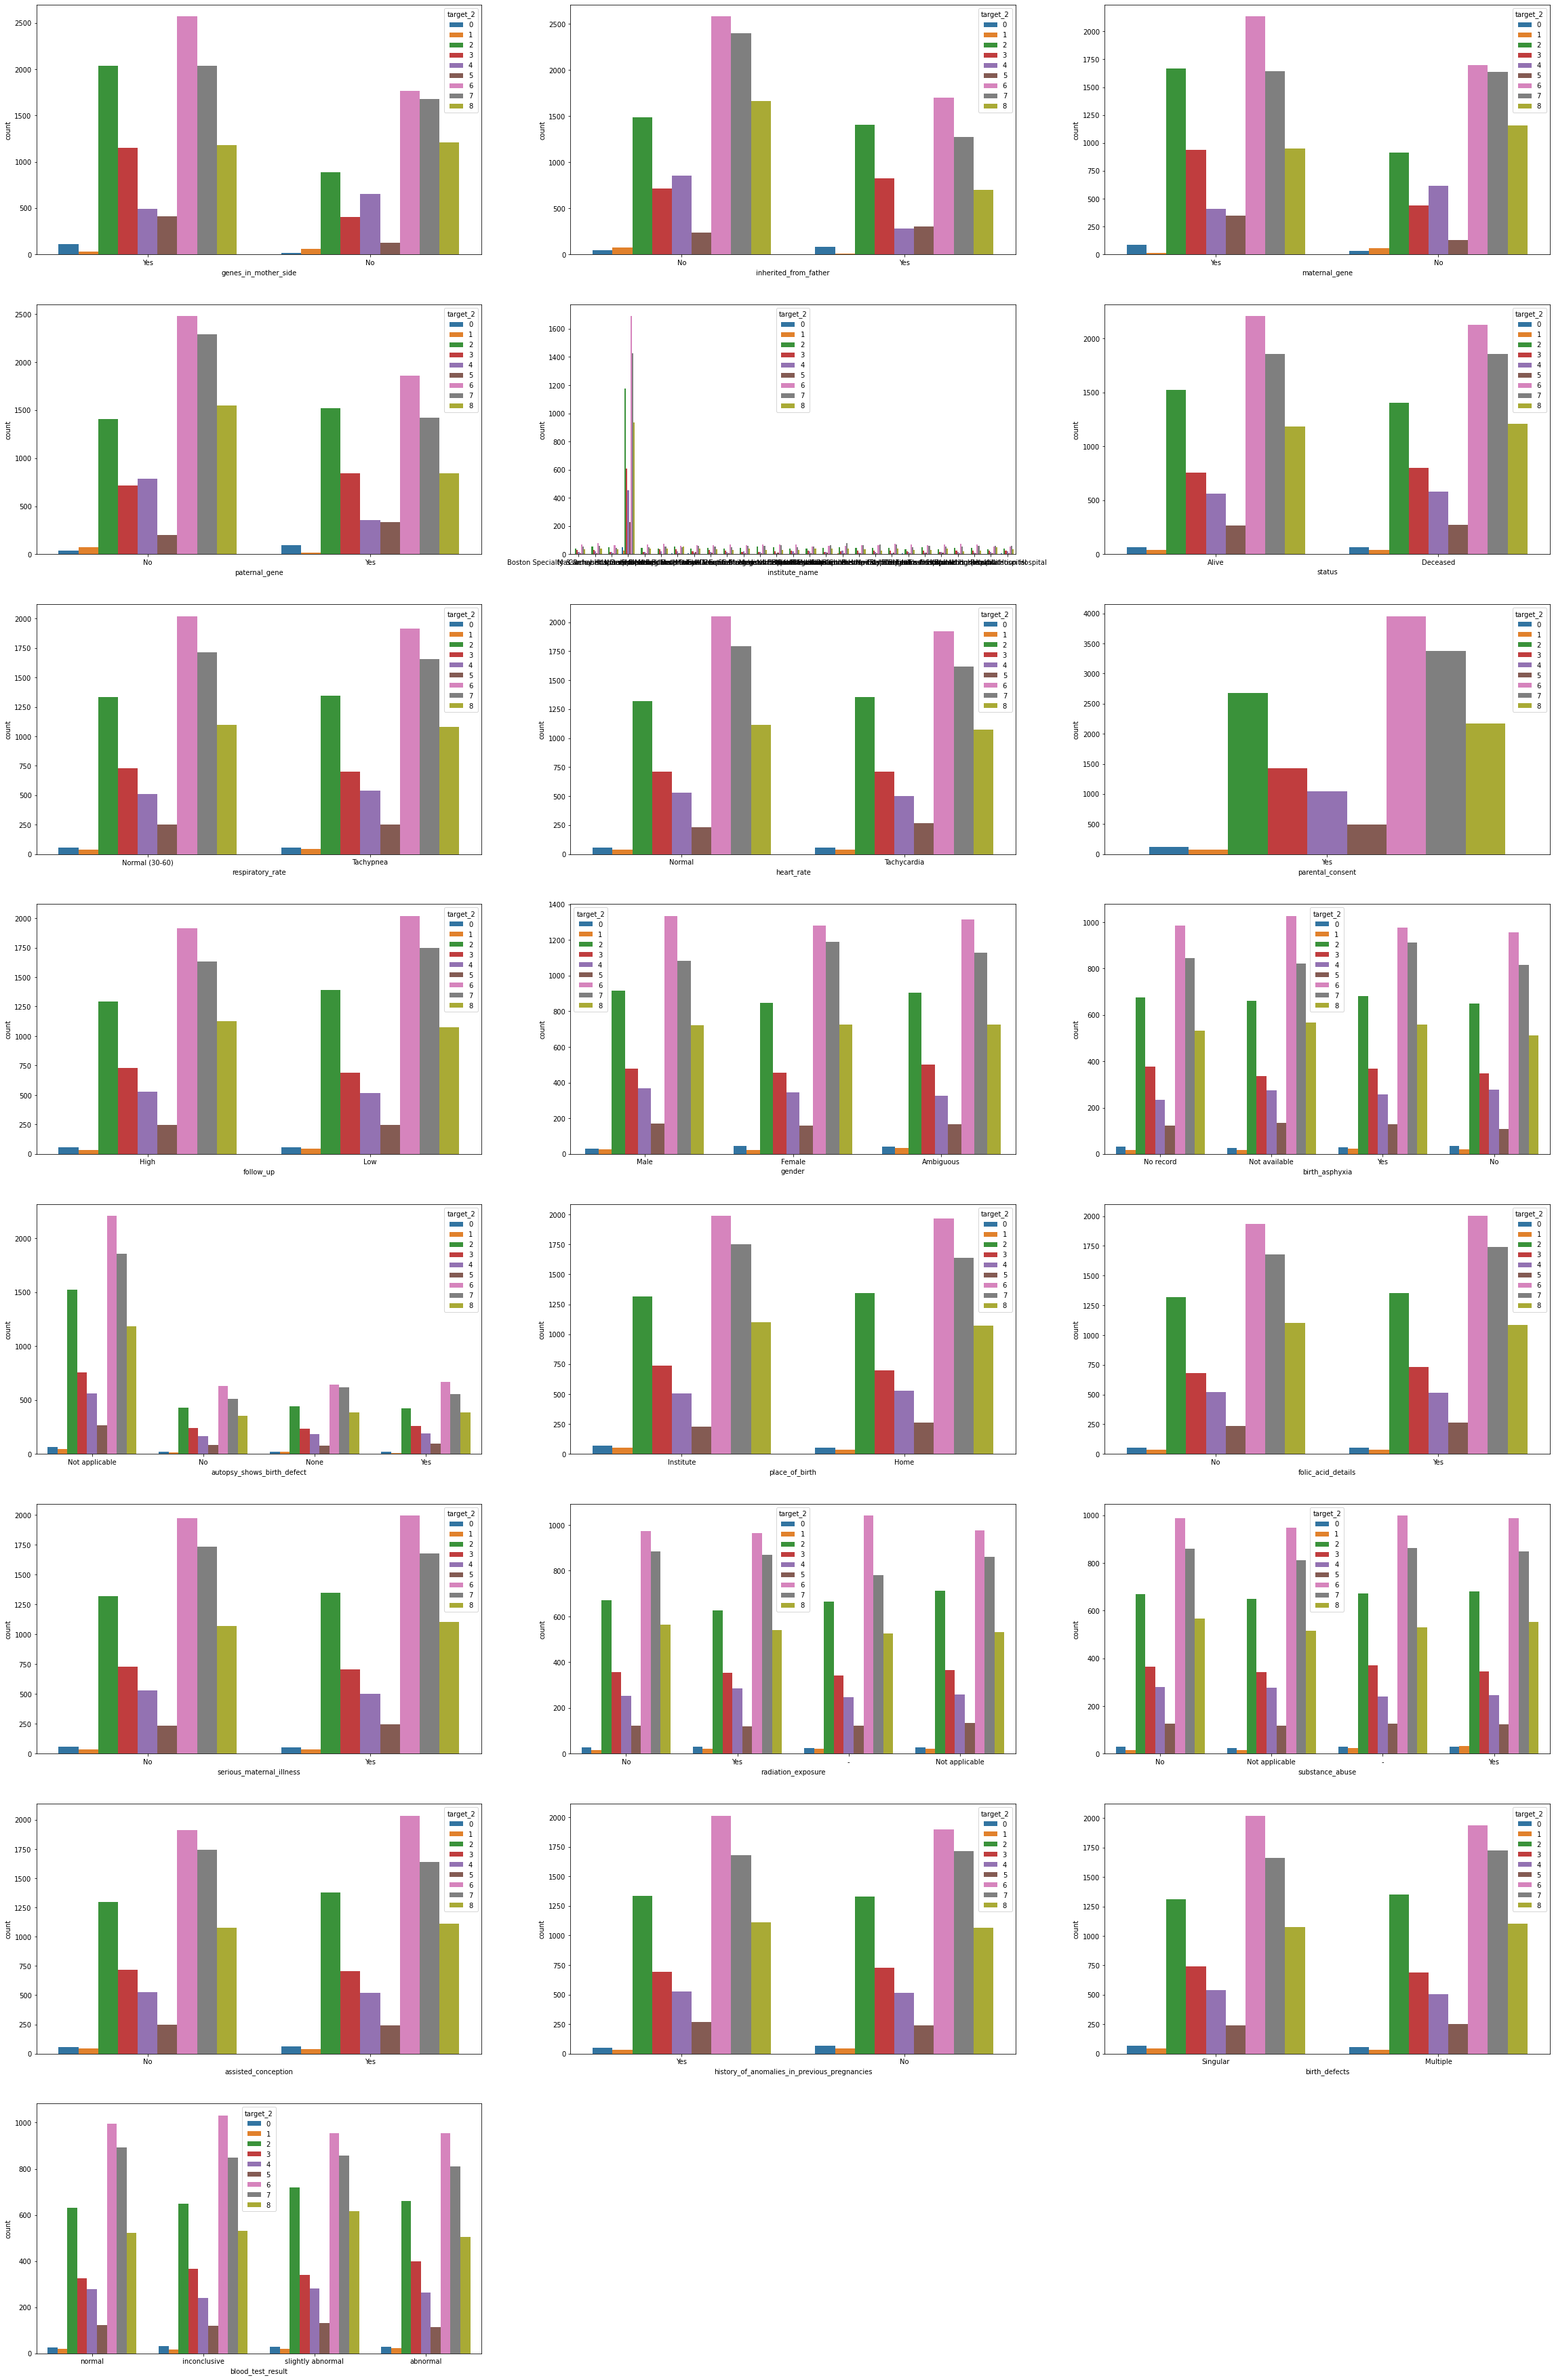

In [49]:
#Reference : https://stackoverflow.com/questions/28738836/matplotlib-with-odd-number-of-subplots
fig, ax = plt.subplots(10, 3, figsize=(40, 80))
for i,j in zip(categorical, ax.flatten()):
    sns.countplot(x=df_train[i],hue=df_train['target_2'],ax=j)
for ax in ax.flat: 
    if not bool(ax.has_data()):
        fig.delaxes(ax)

In [50]:
df_train.drop('parental_consent',axis=1,inplace=True)
df_test.drop('parental_consent',axis=1,inplace=True)

In [51]:
df_train.head()

patient_age genes_in_mother_side inherited_from_father maternal_gene  \
0          2.0                  Yes                    No           Yes   
2          6.0                  Yes                    No            No   
3         12.0                  Yes                    No           Yes   
4         11.0                  Yes                    No           NaN   
5         14.0                  Yes                    No           Yes   

  paternal_gene  blood_cell_count  mother_age  father_age  \
0            No          4.760603         NaN         NaN   
2            No          4.893297        41.0        22.0   
3            No          4.705280        21.0         NaN   
4           Yes          4.720703        32.0         NaN   
5            No          5.103188         NaN         NaN   

                               institute_name    status  ...  \
0  Boston Specialty & Rehabilitation Hospital     Alive  ...   
2                                         NaN     Alive  ...   
3                                         NaN  Deceased  ...   
4                             Carney Hospital     Alive  ...   
5              Massachusetts General Hospital  Deceased  ...   

  white_blood_cell_count blood_test_result symptom_1 symptom_2 symptom_3  \
0               9.857562               NaN       1.0       1.0       1.0   
2                    NaN            normal       0.0       1.0       1.0   
3               7.919321      inconclusive       0.0       0.0       1.0   
4               4.098210               NaN       0.0       0.0       0.0   
5              10.272230            normal       1.0       0.0       0.0   

  symptom_4 symptom_5 target_1 target_2 num_symptoms  
0       1.0       1.0        0        5          5.0  
2       1.0       1.0        1        3          4.0  
3       0.0       0.0        0        6          1.0  
4       0.0       NaN        1        1          0.0  
5       1.0       0.0        2        2          2.0  

[5 rows x 35 columns]

In [52]:
df_train = df_train.replace(['No record','None','-'],np.NaN)
df_test = df_test.replace(['No record','None','-'],np.NaN)

### 2.3.3 Data Imputation

##### Train and Test data Splitting for classifier as target_1

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# X_train,X_test = train_test_split(df_train.drop(['target_1','target_2'],axis=1),test_size=0.2)
# print('Train Shape')
# print(X_train.shape)
# print('Test Shape')
# print(X_test.shape)
X_train = df_train.copy().drop(['target_1','target_2'],axis=1)
X_test = df_test.copy().drop(['patient_id'],axis=1)

In [55]:
#Reference : https://krrai77.medium.com/using-fancyimpute-in-python-eadcffece782
def ordinal_encoder(x):
    encoder = OrdinalEncoder()
    if x.isnull().sum()==0:
        encoder.fit(x.values.reshape(-1,1))
        return encoder
    else:
        nonulls = np.array(x.dropna())
        impute_reshape = nonulls.reshape(-1,1)
        encoder.fit(impute_reshape)
        return encoder

##### Data Imputations

In [56]:
# encoder_ is a dictionary to store all the ordinal encoder objects for each feature as key value pair
encoder_= {}
for i in df_train.select_dtypes(include=['object']).columns:
    encoder_[i]= ordinal_encoder(X_train[i])

In [82]:
joblib.dump(encoder_,open("ordinal_encoder.pkl",'wb'))

In [57]:
# Transforming all the categorical features into numerical values using ordinal encoder on train data
for i in X_train.select_dtypes(include=['object']).columns:
    nonulls = np.array(X_train[i].dropna())
    impute_reshape = nonulls.reshape(-1,1)
    if X_train[i].isnull().sum()==0:
        X_train[i] = encoder_[i].transform(impute_reshape)
    else:
        X_train[i].loc[X_train[i].notnull()] = np.squeeze(encoder_[i].transform(impute_reshape))

In [58]:
# Transforming all the categorical features into numerical values using ordinal encoder on test data
for i in X_test.select_dtypes(include=['object']).columns:
    nonulls = np.array(X_test[i].dropna())
    impute_reshape = nonulls.reshape(-1,1)
    X_test[i].loc[X_test[i].notnull()] = np.squeeze(encoder_[i].transform(impute_reshape))

In [59]:
numerical_cols = [i for i in df_train.select_dtypes(include=['float64']).columns]

In [60]:
categorical_cols = [i for i in df_train.select_dtypes(include=['object']).columns if i != 'parental_consent']

In [66]:
# IterativeImputer is python implementation of MICE imputation technique
clf_impute_numerical = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=20),max_iter=15)
clf_impute_numerical.fit(X_train[numerical_cols])

IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=20), max_iter=15)

In [67]:
clf_impute_categorical = IterativeImputer(estimator=ExtraTreesClassifier(n_estimators=20,max_samples=0.5,bootstrap=True),max_iter=15)
clf_impute_categorical.fit(X_train[categorical_cols])

IterativeImputer(estimator=ExtraTreesClassifier(bootstrap=True, max_samples=0.5,
                                                n_estimators=20),
                 max_iter=15)

In [61]:
clf_impute_categorical = joblib.load('NaN_Impute_categorical.pkl')

In [62]:
clf_impute_numerical = joblib.load('NaN_Impute_numerical.pkl')

In [63]:
# storing imputed data into dataframe
X_train_imputed_num = pd.DataFrame(clf_impute_numerical.transform(X_train[numerical_cols]),columns = numerical_cols,index=X_train.index)
X_test_imputed_num = pd.DataFrame(clf_impute_numerical.transform(X_test[numerical_cols]),columns = numerical_cols,index=X_test.index)

In [64]:
# storing imputed data into dataframe
X_train_imputed_cat = pd.DataFrame(clf_impute_categorical.transform(X_train[categorical_cols]),columns = categorical_cols,index=X_train.index)
X_test_imputed_cat = pd.DataFrame(clf_impute_categorical.transform(X_test[categorical_cols]),columns = categorical_cols,index=X_test.index)

In [65]:
X_train_imputed = pd.concat([X_train_imputed_num,X_train_imputed_cat],axis=1)
X_test_imputed = pd.concat([X_test_imputed_num,X_test_imputed_cat],axis=1)

In [75]:
cols = ['patient_id','blood_cell_count', 'blood_test_result', 'father_age', 'genes_in_mother_side',
 'inherited_from_father', 'maternal_gene', 'mother_age', 'no_of_previous_abortion',
 'paternal_gene', 'patient_age', 'symptom_1', 'symptom_2',
 'symptom_3', 'symptom_4', 'symptom_5', 'white_blood_cell_count']

In [74]:
# inverse transforming the train and test data after NaN values are imputed
for i in cols:
    if i not in  ['symptom_1','symptom_2','symptom_3','symptom_4','symptom_5','parental_consent','no_of_previous_abortion','num_symptoms']:
        X_train_imputed[i]=encoder_[i].inverse_transform(X_train_imputed[i].values.reshape(-1,1))
        X_test_imputed[i]=encoder_[i].inverse_transform(X_test_imputed[i].values.reshape(-1,1))

In [76]:
X_train_imputed

patient_age  blood_cell_count  mother_age  father_age  \
0             2.00          4.760603       38.00       45.65   
2             6.00          4.893297       41.00       22.00   
3            12.00          4.705280       21.00       51.75   
4            11.00          4.720703       32.00       48.85   
5            14.00          5.103188       30.75       41.35   
...            ...               ...         ...         ...   
21005         2.00          5.144151       19.00       42.00   
21006        11.00          5.090495       46.00       38.50   
21007         6.25          5.214750       35.90       38.00   
21009         1.00          5.224828       33.00       24.00   
21010        13.00          5.137942       42.00       21.00   

       no_of_previous_abortion  white_blood_cell_count  symptom_1  symptom_2  \
0                         2.55                9.857562        1.0        1.0   
2                         4.00                5.342390        0.0        1.0   
3                         1.00                7.919321        0.0        0.0   
4                         4.00                4.098210        0.0        0.0   
5                         0.00               10.272230        1.0        0.0   
...                        ...                     ...        ...        ...   
21005                     4.00                9.863374        1.0        0.0   
21006                     2.15                7.932050        1.0        0.0   
21007                     3.00                7.086312        1.0        0.0   
21009                     1.00               12.000000        0.0        1.0   
21010                     1.00                6.751866        1.0        0.0   

       symptom_3  symptom_4  ...  autopsy_shows_birth_defect  place_of_birth  \
0            1.0        1.0  ...              Not applicable       Institute   
2            1.0        1.0  ...              Not applicable            Home   
3            1.0        0.0  ...                          No       Institute   
4            0.0        0.0  ...              Not applicable       Institute   
5            0.0        1.0  ...                         Yes       Institute   
...          ...        ...  ...                         ...             ...   
21005        1.0        0.0  ...              Not applicable            Home   
21006        0.0        0.0  ...              Not applicable       Institute   
21007        1.0        0.0  ...              Not applicable            Home   
21009        1.0        1.0  ...                         Yes            Home   
21010        1.0        0.0  ...              Not applicable            Home   

      folic_acid_details serious_maternal_illness radiation_exposure  \
0                     No                       No                 No   
2                    Yes                       No                Yes   
3                     No                      Yes     Not applicable   
4                     No                      Yes     Not applicable   
5                     No                       No                 No   
...                  ...                      ...                ...   
21005                 No                      Yes                 No   
21006                Yes                       No                 No   
21007                 No                      Yes     Not applicable   
21009                Yes                       No                 No   
21010                 No                      Yes                Yes   

      substance_abuse assisted_conception  \
0                  No                  No   
2                 Yes                 Yes   
3      Not applicable                 Yes   
4      Not applicable                 Yes   
5                  No                  No   
...               ...                 ...   
21005  Not applicable                  No   
21006  Not applicable                  No   
21007              No                 Yes   
2

##### Dumping imputed object and ordinal encoder values to disk

In [75]:
filename = "NaN_Impute_numerical.pkl"
joblib.dump(clf_impute_numerical,open(filename,'wb'))
filename = "NaN_Impute_categorical.pkl"
joblib.dump(clf_impute_categorical,open(filename,'wb'))

In [134]:
def text_processor(x):
    """This function is used for text pre processing to remove all the special characters and replace spaces with _"""
    x = x.replace('&','')
    x = x.replace('\'s','')
    x = x.replace('.','')
    x = x.lower()
    x = x.split()
    x = ' '.join(x)
    x = x.replace(' ','_')
    return x

In [80]:
# institute_name feature text is having special characters so preprocessing of the features text
X_train_imputed['institute_name'] = X_train_imputed['institute_name'].apply(text_processor)
X_test_imputed['institute_name'] = X_test_imputed['institute_name'].apply(text_processor)

In [81]:
def encoder(x):
    """This function takes dataframe as input and perform standardization on numerical features and label encoding on categorical features then returns the dataframe"""
    x = x.copy()
    n,c = column_separator(x)
    for i in x.columns:
        if i in n:
            std_scaler = StandardScaler()
#             x[i] = np.asarray(x[i].values)
            x[i] = std_scaler.fit_transform(x[i].values.reshape(-1,1))
        elif i in c:
            label = LabelEncoder()
            x[i] = label.fit_transform(x[i])
    return x            

##### Feature Engineering

In [84]:
X_train_imputed['FE_1'] = X_train_imputed['num_symptoms']/(X_train_imputed['no_of_previous_abortion']+1)
X_test_imputed['FE_1'] = X_test_imputed['num_symptoms']/(X_test_imputed['no_of_previous_abortion']+1)
X_train_imputed.drop('no_of_previous_abortion',axis=1,inplace=True)
X_test_imputed.drop('no_of_previous_abortion',axis=1,inplace=True)

In [85]:
X_train_imputed['FE_2'] = X_train_imputed['blood_cell_count']/(X_train_imputed['white_blood_cell_count']+1)
X_test_imputed['FE_2'] = X_test_imputed['blood_cell_count']/(X_test_imputed['white_blood_cell_count']+1)
X_train_imputed.drop(['no_of_previous_abortion',axis=1,inplace=True)
X_test_imputed.drop('no_of_previous_abortion',axis=1,inplace=True)

In [86]:
X_train_imputed['avg_parents_age'] = (X_train_imputed['father_age']+X_train_imputed['mother_age'])/2
X_train_imputed.drop(['mother_age','father_age'],axis=1,inplace=True)

In [87]:
X_test_imputed['avg_parents_age'] = (X_test_imputed['father_age']+X_test_imputed['mother_age'])/2
X_test_imputed.drop(['mother_age','father_age'],axis=1,inplace=True)

In [88]:
X_train_imputed['target_1']=df_train['target_1'].loc[X_train_imputed.index]
X_train_imputed['target_2']=df_train['target_2'].loc[X_train_imputed.index]

In [89]:
x = encoder(X_train_imputed.drop('target_1',axis=1))

In [90]:
X_train_imputed.to_csv('imputed_train.csv')
X_test_imputed.to_csv('imputed_test.csv')

### 2.3.4 Multivariate Analysis

In [92]:
#performing dimensionality reduction using TSNE
tsne = TSNE(perplexity=50)
result = tsne.fit_transform(x)

##### TSNE Visualization

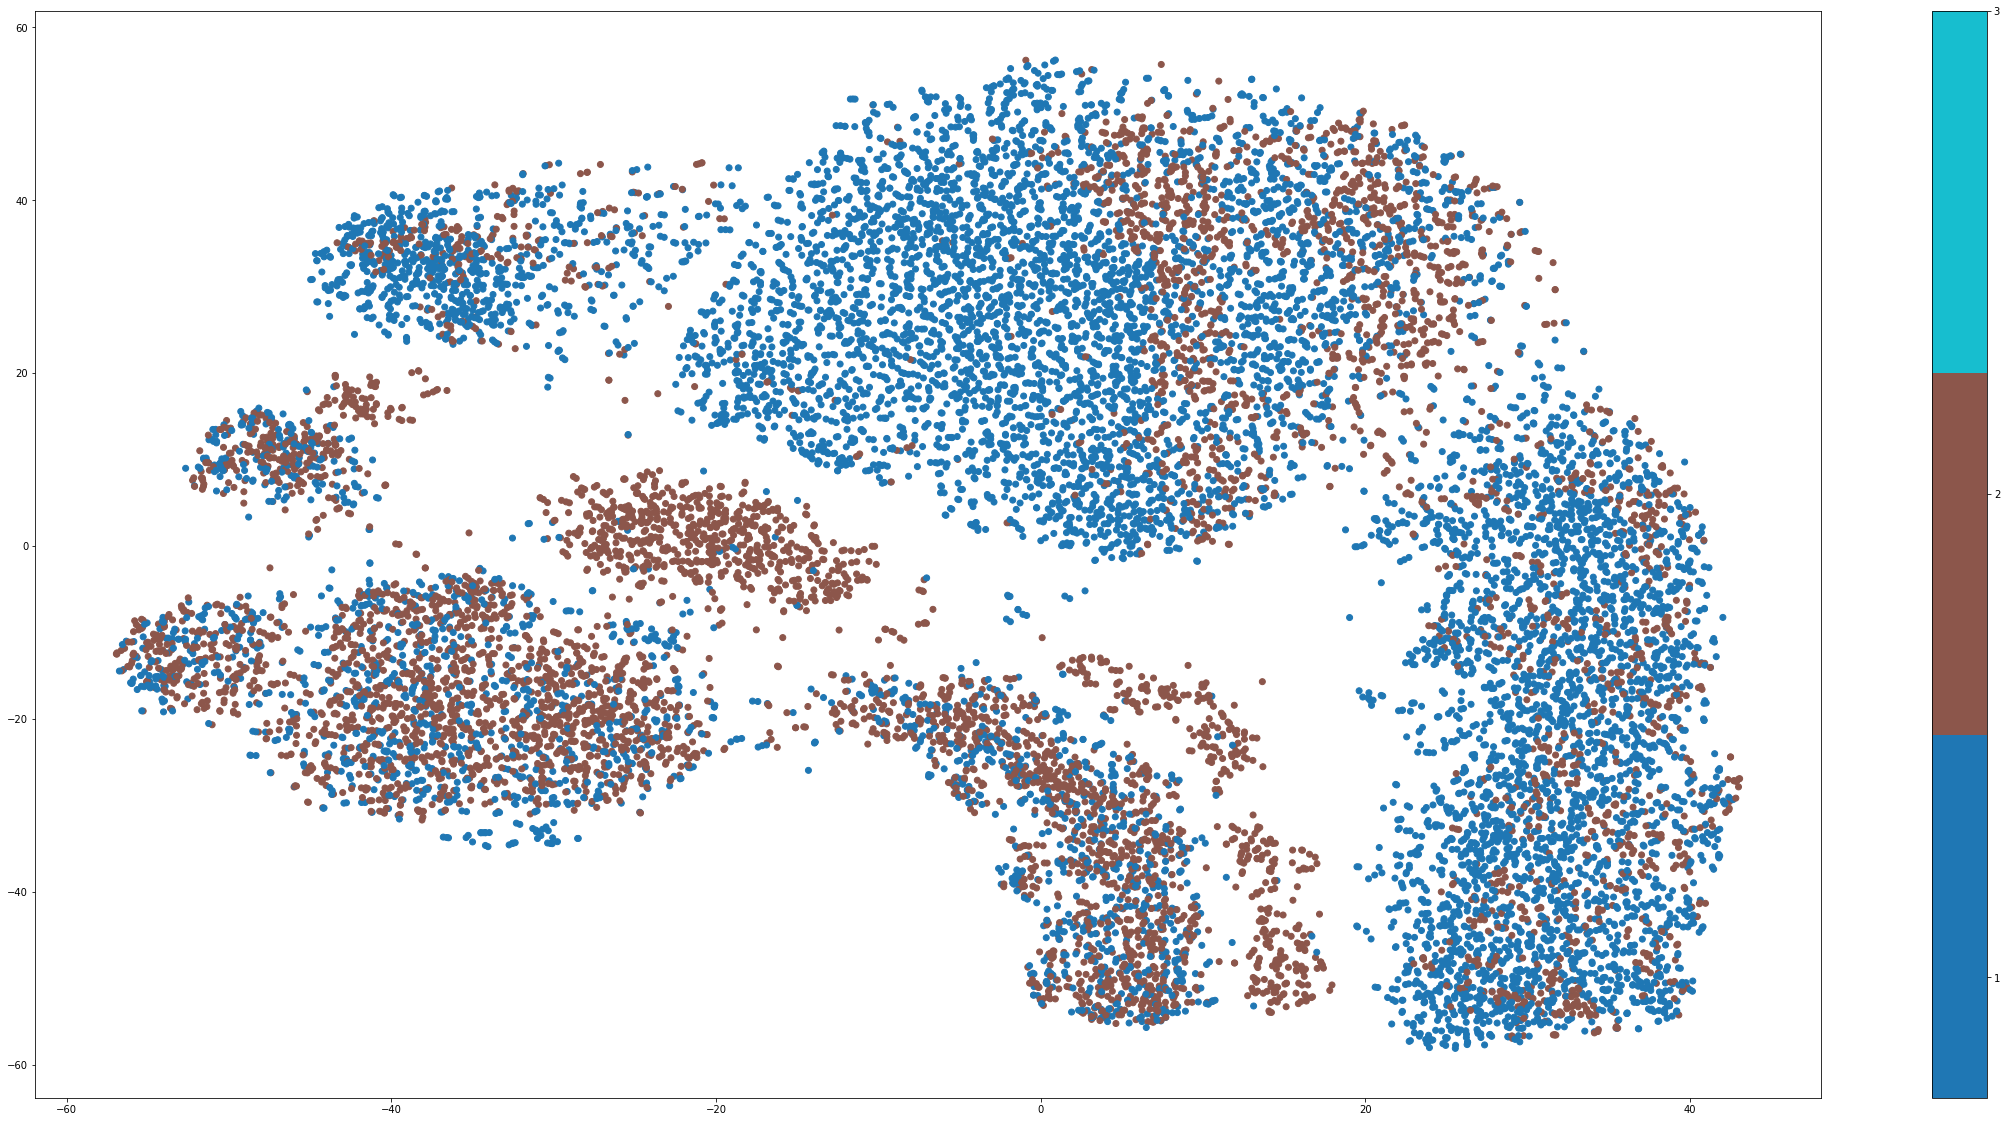

In [93]:
# TSNE visualization
plt.figure(figsize=(40,20))
vis_x = result[:,0]
vis_y = result[:,1]
plt.scatter(vis_x, vis_y, c=X_train_imputed['target_1'].loc[x.index], cmap=plt.cm.get_cmap("tab10",3))
plt.colorbar(ticks=range(4))
plt.clim(0.75, 3)
plt.show()

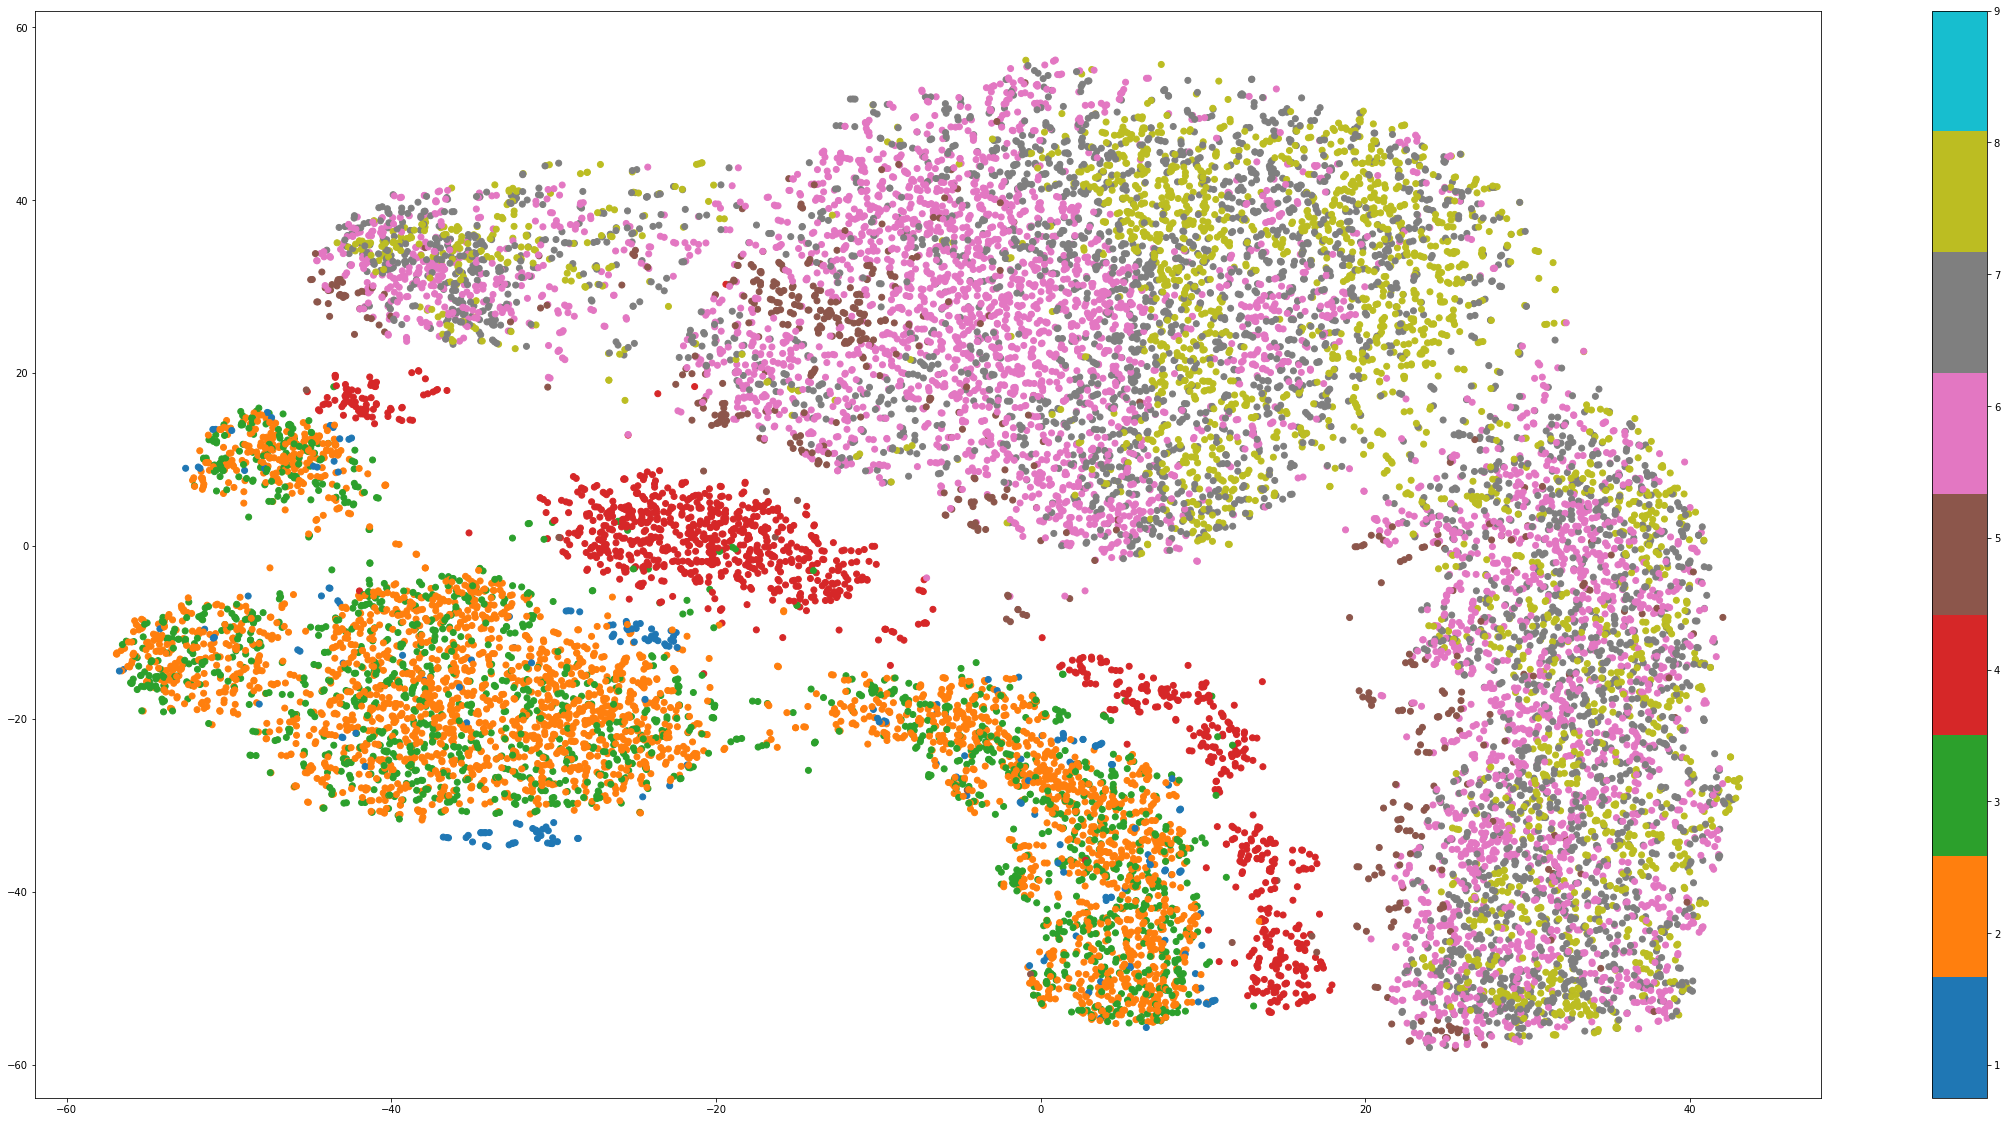

In [94]:
# TSNE visualization
plt.figure(figsize=(40,20))
vis_x = result[:,0]
vis_y = result[:,1]
plt.scatter(vis_x, vis_y, c=X_train_imputed['target_2'].loc[x.index], cmap=plt.cm.get_cmap("tab10",9))
plt.colorbar(ticks=range(10))
plt.clim(0.75, 9)
plt.show()

#### Pearson Correlation betweeen different features in the dataset

In [95]:
correlation = X_train_imputed.copy()

In [96]:
correlation = encoder(correlation.drop(['target_1','target_2'],axis=1))

In [97]:
correlation['target_1'] = df_train['target_1'].loc[correlation.index]
correlation['target_2'] = df_train['target_2'].loc[correlation.index]

In [98]:
# Pearson correlation
res = correlation.corr()

In [99]:
correlation.head()

patient_age  blood_cell_count  white_blood_cell_count  num_symptoms  \
0    -1.179878         -0.744389                0.938808      2.252423   
2    -0.227934         -0.032695               -1.543972      1.381953   
3     1.199981         -1.041107                0.177610     -1.229456   
4     0.961995         -0.958391               -1.323041     -2.099925   
5     1.675953          1.093037                1.101659     -0.358986   

   genes_in_mother_side  inherited_from_father  maternal_gene  paternal_gene  \
0                     1                      0              1              0   
2                     1                      0              0              0   
3                     1                      0              1              0   
4                     1                      0              1              1   
5                     1                      0              1              0   

   institute_name  status  ...  substance_abuse  assisted_conception  \
0               5       0  ...                0                    0   
2              18       0  ...                0                    1   
3              11       1  ...                1                    1   
4               7       0  ...                1                    1   
5              17       1  ...                0                    0   

   history_of_anomalies_in_previous_pregnancies  birth_defects  \
0                                             1              1   
2                                             1              1   
3                                             1              1   
4                                             0              0   
5                                             0              0   

   blood_test_result      FE_1      FE_2  avg_parents_age  target_1  target_2  
0                  0  0.082582 -0.879987         0.639920         0         5  
2                  2 -0.304481  1.859100        -0.936146         1         3  
3                  1 -0.636794 -0.498981        -1.225839         0         6  
4                  2 -1.190651  1.205121         0.408856         1         1  
5                  2  1.024774 -0.818983        -0.122248         2         2  

[5 rows x 30 columns]

##### Pearson correlation plot

<AxesSubplot:>

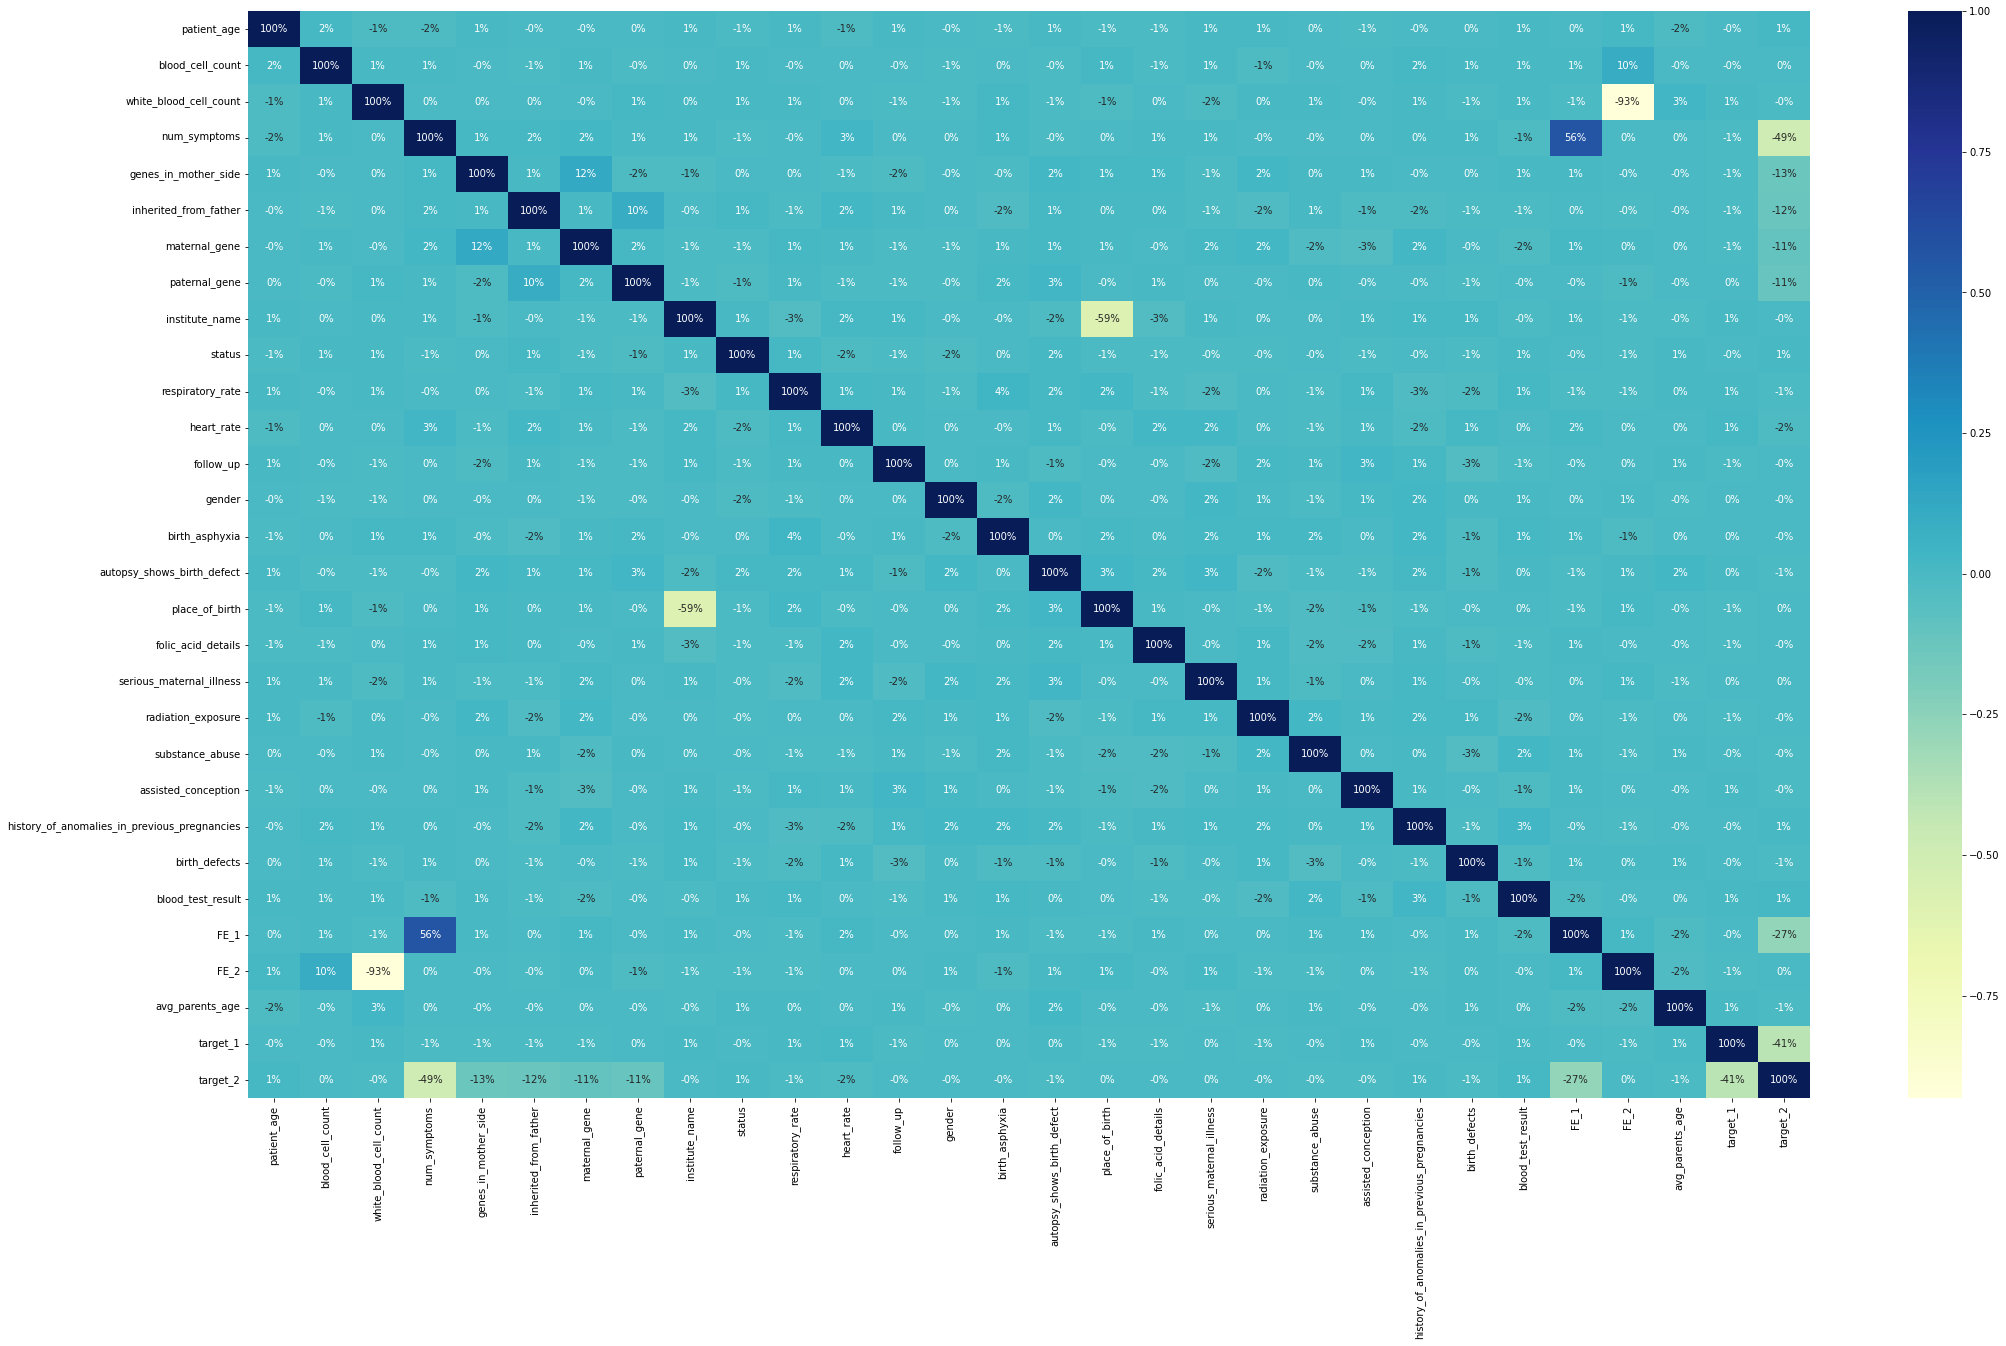

In [100]:
# Correlation plot of all the features in the dataset
plt.figure(figsize=(35,20))
sns.heatmap(res,annot=True,cmap='YlGnBu',fmt=".0%")

* Considering correlation feature num_of_symptoms with high correlation with the target
* features realted to genes fro mothe and father are also having good correlation with the target when compared to other features

In [101]:
f = X_train_imputed.copy()

In [102]:
f.drop('FE_1',axis=1,inplace=True)

##### Training lightgbm classifier on the dataset to get feature importance as target_1 as variable

In [103]:
import lightgbm as lgb

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [105]:
f=encoder(f)

In [106]:
X = f.drop(['target_1','target_2'],axis=1)
y = f.target_2

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

##### Hyper-Parameter tuning of lightgbm

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
params = {
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],'n_estimators':[200,500,1000,2000]
}

In [110]:
xgbclf = lgb.LGBMClassifier()
clf =GridSearchCV(xgbclf,params,cv=3,scoring='f1_macro',verbose=3,return_train_score=True)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END learning_rate=0.0001, n_estimators=200;, score=(train=0.046, test=0.046) total time=   1.9s
[CV 2/3] END learning_rate=0.0001, n_estimators=200;, score=(train=0.046, test=0.046) total time=   1.7s
[CV 3/3] END learning_rate=0.0001, n_estimators=200;, score=(train=0.046, test=0.046) total time=   2.1s
[CV 1/3] END learning_rate=0.0001, n_estimators=500;, score=(train=0.046, test=0.046) total time=   4.7s
[CV 2/3] END learning_rate=0.0001, n_estimators=500;, score=(train=0.048, test=0.046) total time=   4.6s
[CV 3/3] END learning_rate=0.0001, n_estimators=500;, score=(train=0.046, test=0.046) total time=   4.7s
[CV 1/3] END learning_rate=0.0001, n_estimators=1000;, score=(train=0.053, test=0.048) total time=  10.1s
[CV 2/3] END learning_rate=0.0001, n_estimators=1000;, score=(train=0.054, test=0.050) total time=  10.3s
[CV 3/3] END learning_rate=0.0001, n_estimators=1000;, score=(train=0.046, test=0.045) total time

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                         'n_estimators': [200, 500, 1000, 2000]},
             return_train_score=True, scoring='f1_macro', verbose=3)

In [111]:
bst = clf.best_estimator_
bst.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.01, n_estimators=200)

##### Storing Feature Importance into DataFrame

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

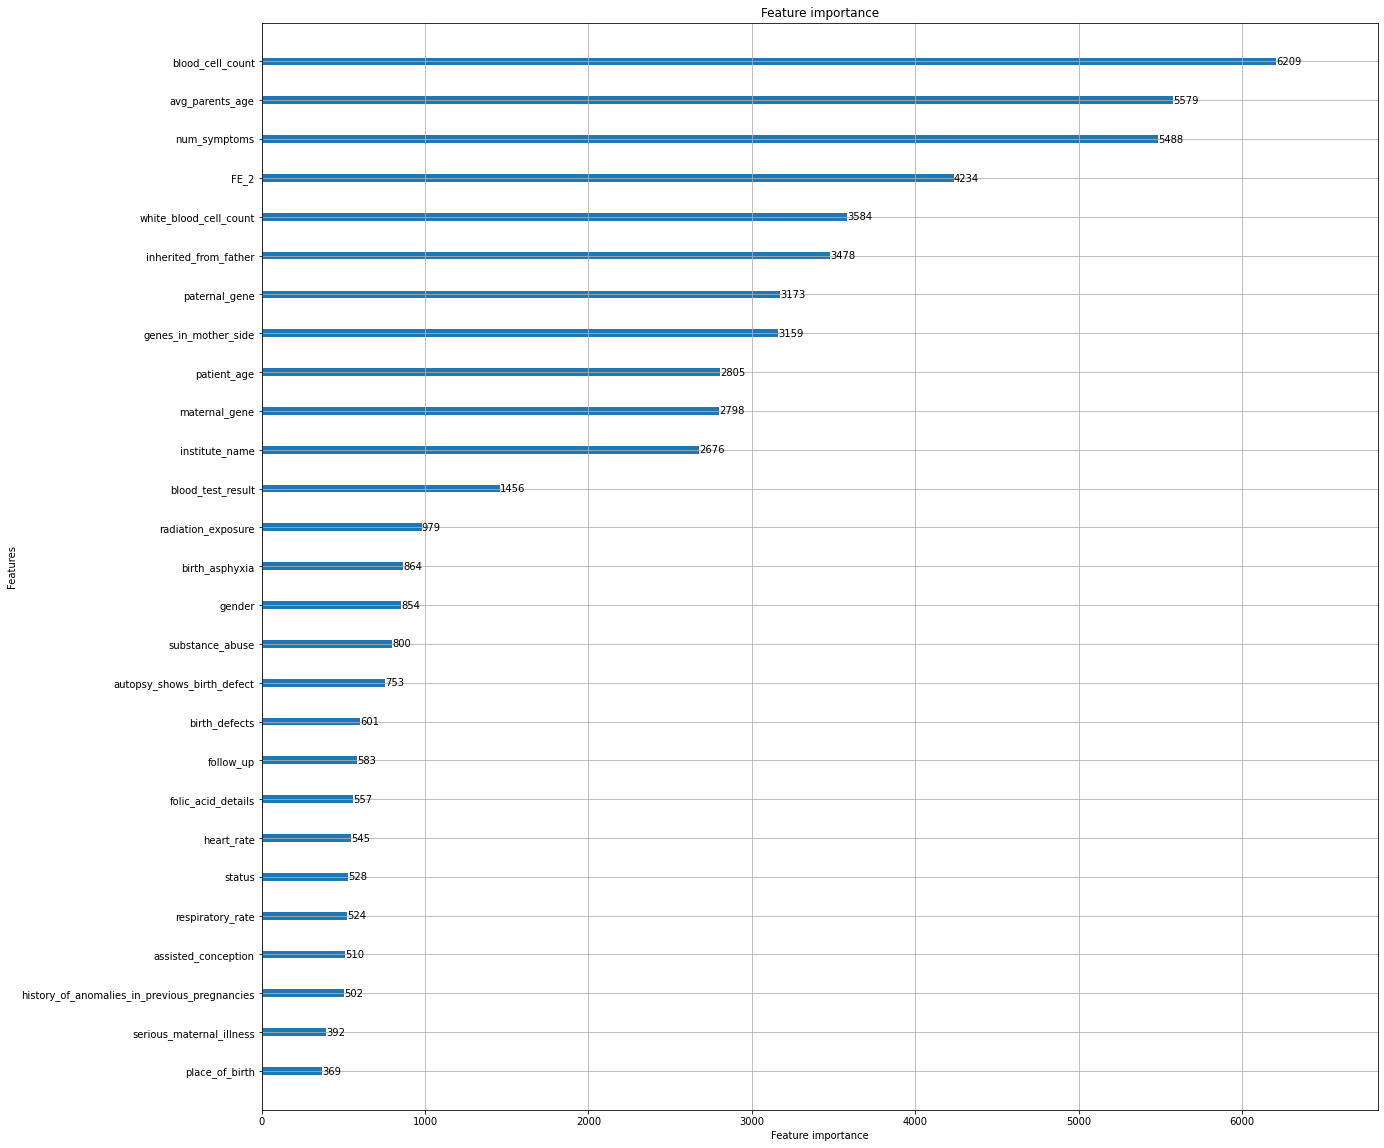

In [112]:
lgb.plot_importance(bst,figsize=(20,20))

In [113]:
bst.predict(X_test)

array([6, 2, 7, ..., 6, 2, 8])

In [114]:
from sklearn.metrics import f1_score
f1_score(y_test,bst.predict(X_test),average='macro')

0.28265215666934485

##### Plot showing important features in decreasing order

* Above plot shows that blood_cell_count,white_blood_cell_count,age of patient,mother and father are among top features in classification where we have seen very low correlation with the target in correlation plot.
* Along with feature importance and correlation plot we can conclude that Symptom features are helpful in classifying the target

In [115]:
from sklearn.feature_selection import mutual_info_classif

In [116]:
imp = pd.Series(mutual_info_classif(X_train,y_train),X_train.columns)

<AxesSubplot:>

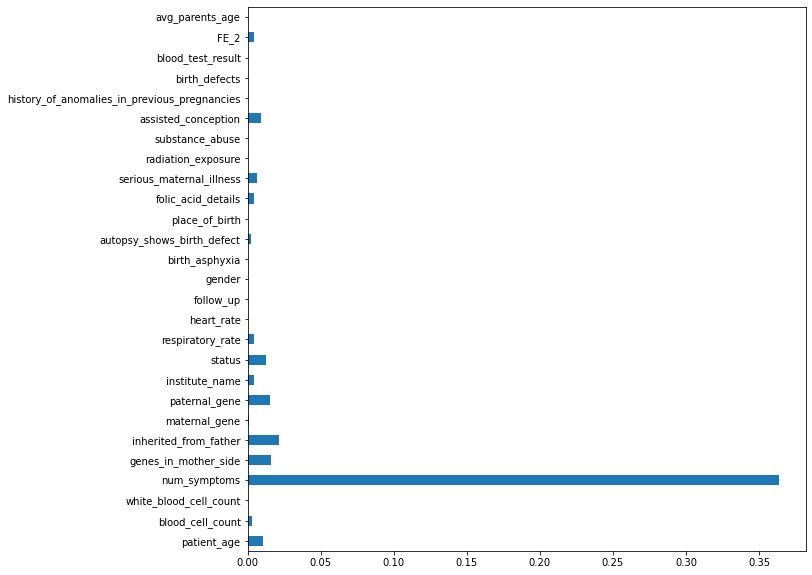

In [117]:
plt.figure(figsize=(10,10))
imp.plot(kind='barh')

##### Building classifier for predicting target_2 that is disorder_subclass

In [118]:
cols_ = ['tar_2_'+str(i) for i in range(9)]

In [119]:
modified_X_train=X_train.copy()
modified_X_test=X_test.copy()
modified_X_train['target_2'] = pd.Series(bst.predict(X_train),index=X_train.index)
modified_X_test['target_2'] =  pd.Series(bst.predict(X_test),index=X_test.index)
modified_X_train['target_1'] = df_train['target_1'].loc[X_train.index]
modified_X_test['target_1'] =  df_train['target_1'].loc[X_test.index]

In [120]:
class_proba_train = pd.DataFrame(bst.predict_proba(X_train),columns=cols_,index=modified_X_train.index)
class_proba_test = pd.DataFrame(bst.predict_proba(X_test),columns=cols_,index = modified_X_test.index)

In [121]:
modified_X_train = pd.concat([modified_X_train,class_proba_train],axis=1)
modified_X_test = pd.concat([modified_X_test,class_proba_test],axis=1)

In [122]:
df_train_target_2_predict = pd.DataFrame(np.vstack((modified_X_train,modified_X_test)),columns=modified_X_train.columns)

In [123]:
X=df_train_target_2_predict.drop('target_1',axis=1)
y=df_train_target_2_predict.target_1

In [124]:
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.2,stratify=y)

##### Hyper-Parameter tuning of lightgbm

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
params = {
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],'n_estimators':[200,500,1000,2000]
}

In [127]:
xgbclf = lgb.LGBMClassifier()
clf =GridSearchCV(xgbclf,params,cv=3,scoring='f1_macro',verbose=3,return_train_score=True)
clf.fit(X_tr,y_tr)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END learning_rate=0.0001, n_estimators=200;, score=(train=0.225, test=0.225) total time=   0.7s
[CV 2/3] END learning_rate=0.0001, n_estimators=200;, score=(train=0.225, test=0.225) total time=   0.5s
[CV 3/3] END learning_rate=0.0001, n_estimators=200;, score=(train=0.225, test=0.225) total time=   0.6s
[CV 1/3] END learning_rate=0.0001, n_estimators=500;, score=(train=0.225, test=0.225) total time=   1.6s
[CV 2/3] END learning_rate=0.0001, n_estimators=500;, score=(train=0.225, test=0.225) total time=   1.5s
[CV 3/3] END learning_rate=0.0001, n_estimators=500;, score=(train=0.225, test=0.225) total time=   1.8s
[CV 1/3] END learning_rate=0.0001, n_estimators=1000;, score=(train=0.225, test=0.225) total time=   3.3s
[CV 2/3] END learning_rate=0.0001, n_estimators=1000;, score=(train=0.225, test=0.225) total time=   3.1s
[CV 3/3] END learning_rate=0.0001, n_estimators=1000;, score=(train=0.225, test=0.225) total time

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                         'n_estimators': [200, 500, 1000, 2000]},
             return_train_score=True, scoring='f1_macro', verbose=3)

In [128]:
bst_2 = clf.best_estimator_
bst_2.fit(X_tr,y_tr)

LGBMClassifier(learning_rate=0.01, n_estimators=500)

##### Storing Feature Importance into DataFrame

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

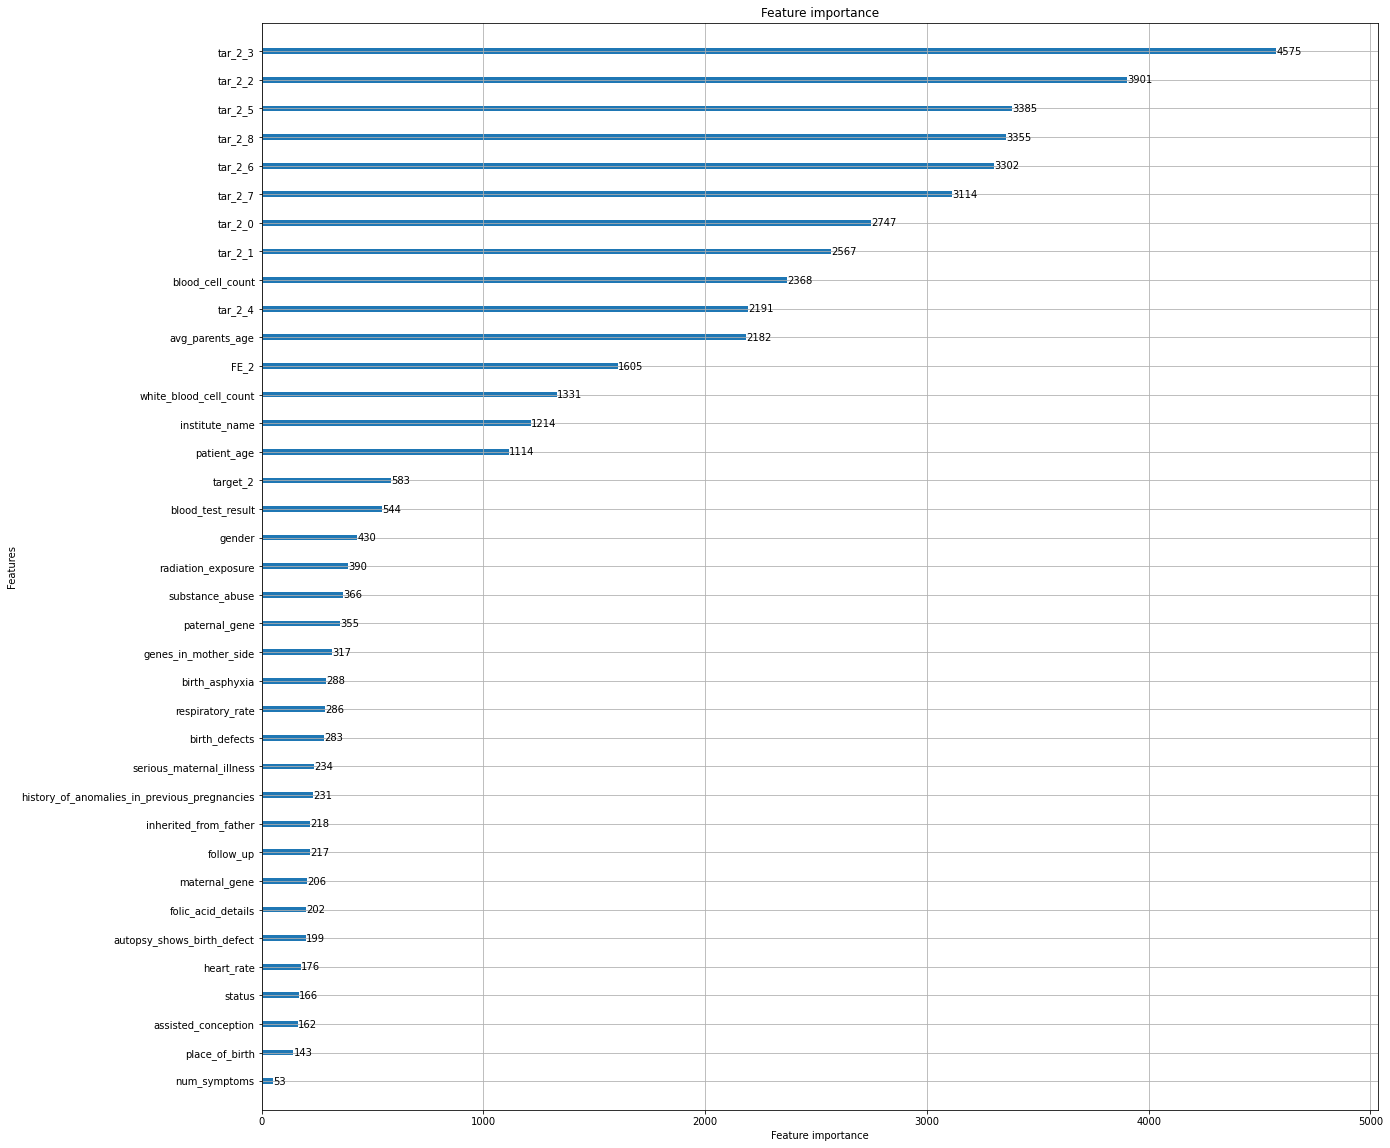

In [129]:
lgb.plot_importance(bst_2,figsize=(20,20))

In [130]:
bst_2.predict(X_te)

array([0., 2., 2., ..., 1., 0., 2.])

In [131]:
from sklearn.metrics import f1_score
f1_score(y_te,bst_2.predict(X_te),average='macro')

0.6487576666751588

In [132]:
score1 = max(0, 100*f1_score(y_test,bst.predict(X_test), average="macro"))

score2 = max(0, 100*f1_score(y_te,bst_2.predict(X_te), average="macro"))

score = (score1/2)+(score2/2)

In [133]:
score

46.57049116722518

In [134]:
from sklearn.feature_selection import mutual_info_classif

In [135]:
imp = pd.Series(mutual_info_classif(X_tr,y_tr),X_tr.columns)

<AxesSubplot:>

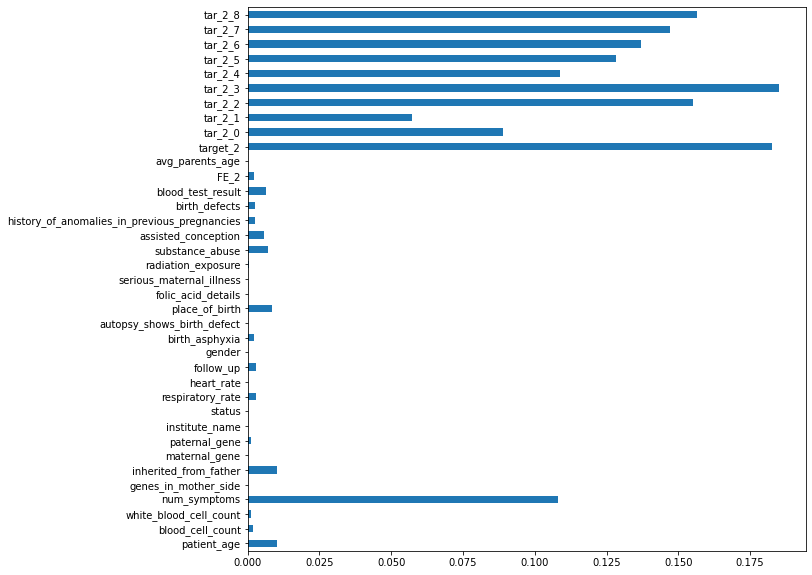

In [136]:
plt.figure(figsize=(10,10))
imp.plot(kind='barh')